# Functions definitions and library imports

In [1]:
from SGD_PowerLaw import *
import cv2
import scipy

# !pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-06-20 11:50:46 -03:00)


# Loading FreeHand data from Mosis XP

In [2]:
lines = load_lines_from_xpp_file('Gaivota2D.xpp', 0, 0, 0, [])
lines = np.asarray(lines)
segm_group_angles = compute_line_angles(lines)

time: 500 ms (started: 2024-06-20 11:50:49 -03:00)


c:\Anaconda3\envs\py310\lib\site-packages\sklearn\decomposition\_pca.py:541: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


### Dataset 1 rosechart

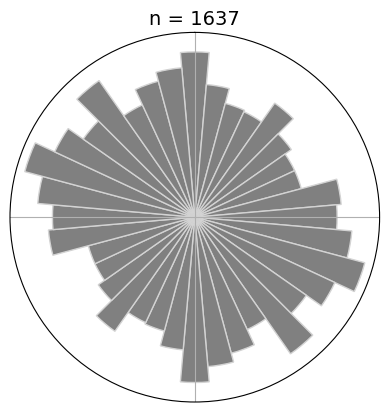

time: 172 ms (started: 2024-06-06 15:33:38 -03:00)


In [360]:
aux = segm_group_angles[np.where(segm_group_angles[:, 1] >0)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart.pdf')
#cv2.imwrite('rosechart.png', cv2.cvtColor(rosechart_plot, cv2.COLOR_RGB2BGR))

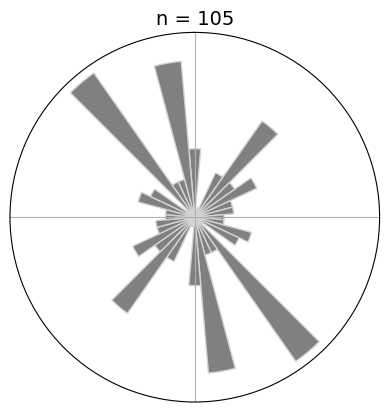

time: 157 ms (started: 2024-05-31 11:39:49 -03:00)


In [27]:
aux = segm_group_angles[np.where(segm_group_angles[:, 1] > 15)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart_10.pdf')
# cv2.imwrite('rosechart_10.png', cv2.cvtColor(rosechart_plot, cv2.COLOR_RGB2BGR))

In [65]:
# lines = np.asarray(lines)
x_offset = np.abs(np.sort([np.min(lines[:,0]), np.min(lines[:,2])])[0])
y_offset = np.abs(np.sort([np.min(lines[:,1]), np.min(lines[:,3])])[0])
# lines[:,0] = lines[:,0] + x_offset
# lines[:,2] = lines[:,2] + x_offset
# lines[:,1] = lines[:,1] + y_offset
# lines[:,3] = lines[:,3] + y_offset
x_max = np.sort([np.max(lines[:,0])+ x_offset, np.max(lines[:,2])+ x_offset])[1]
y_max = np.sort([np.max(lines[:,1])+ y_offset, np.max(lines[:,3])+ y_offset])[1]
lines = lines.round(decimals=3)

time: 0 ns (started: 2024-05-31 18:32:48 -03:00)


In [66]:
base_offset = np.asarray([649188.0, 9384790.0])
position1 = np.asarray([649269.37, 9384756.70])
position2 = np.asarray([649076.94, 9384874.84])
# (base_offset-position1)+np.asarray([x_offset, y_offset])

time: 0 ns (started: 2024-05-31 18:32:54 -03:00)


In [8]:
# print(x_offset-(base_offset[0]-position2[0]))
# print(circle_center1)

time: 0 ns (started: 2023-07-01 00:54:46 -03:00)


## Acquiring datasets 2 and 3 from circular scanlines

In [3]:
# Get fracture traces in scanlines
radius = 50

# circle_center1 = (70, 55)
circle_center1 = [20, 20]
segments_in_circle1 = circular_scanline(lines, circle_center1, radius)

# circle_center2 = (200, 150.0)
circle_center2 = [-110, -70]
segments_in_circle2 = circular_scanline(lines, circle_center2, radius)

time: 16 ms (started: 2024-06-20 11:50:56 -03:00)


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:212: RuntimeWarning: invalid value encountered in scalar divide
  u = -b / (2 * a)


### Saving datasets to shapefiles

In [63]:
# save_shapefile('area1', transfom_to_geocoordinates(segments_in_circle1, base_offset), segm_group_angles)
# save_shapefile('area2', transfom_to_geocoordinates(segments_in_circle2, base_offset), segm_group_angles)

### Saving scanline center points to shapefile

In [221]:
# w = shapefile.Writer('points')
# w.field('name', 'C')

# p, q =  transfom_to_geocoordinates_point(circle_center1, base_offset)
# w.point(p, q) 
# w.record('point1')

# p, q =  transfom_to_geocoordinates_point(circle_center2, base_offset)
# w.point(p, q) 
# w.record('point2')

# w.close()

### Ploting empirical datasets

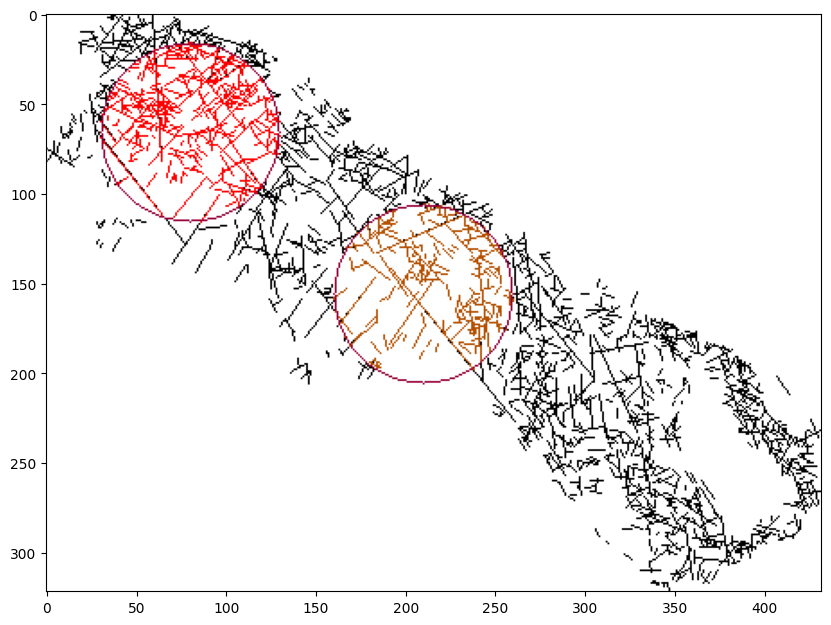

time: 156 ms (started: 2024-05-31 18:33:39 -03:00)


In [70]:
canvas = np.full((int(y_max), int(x_max), 3), 255, np.uint8)
# Draw the segments in the canvas


canvas = draw_lines(canvas, lines, x_offset, y_offset, (0,0,0))
canvas = draw_lines(canvas, segments_in_circle1, x_offset, y_offset, (180,80,0))
canvas = draw_lines(canvas, segments_in_circle2, x_offset, y_offset, (255,0,0))

   
cv2.circle(canvas, np.int32(circle_center1)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)
cv2.circle(canvas, np.int32(circle_center2)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)

plt.figure(figsize=(10,10))
plt.imshow(canvas)

In [5]:
def compute_p_statistics_circular(lines, image, radius):
    data = []
    circumference = radius*2
    maxH = int(np.shape(image)[0]/circumference)+1
    maxV = int(np.shape(image)[1]/circumference)+1

    circle_area = np.pi*radius**2
    

    for i in range(0, maxV):
        for j in range(0, maxH):
            x0 = float(i*circumference)
            x1 = float((i+1)*circumference)
            y0 = float(j*circumference)
            y1 = float((j+1)*circumference)
            circle_center = (np.mean((x0, x1)), np.mean((y0, y1)))
            temp_lines = circular_scanline(lines, circle_center, radius)
            line_data = compute_line_angles(temp_lines)
            total_length = np.sum(line_data[:,1])

            intensity = total_length/circle_area
            intensity = np.reshape(intensity, (1))[0]

            data.append(np.reshape((circle_center[0], circle_center[1], intensity), (1, 3)))
    data = np.reshape(data, (np.shape(data)[0], 3))
    return data

time: 0 ns (started: 2024-06-19 11:55:02 -03:00)


time: 15 ms (started: 2024-05-28 19:31:27 -03:00)


In [194]:
# x0 = np.sort([np.min(lines[:,0]), np.min(lines[:,2])])[1]
# y0 = np.sort([np.min(lines[:,1]), np.min(lines[:,3])])[1]

# x1 = np.sort([np.max(lines[:,0]), np.max(lines[:,2])])[1]
# y1 = np.sort([np.max(lines[:,1]), np.max(lines[:,3])])[1]

time: 0 ns (started: 2024-05-27 21:47:48 -03:00)


### REV (Representative Elementary Volume) estimation

0.032262027871280415


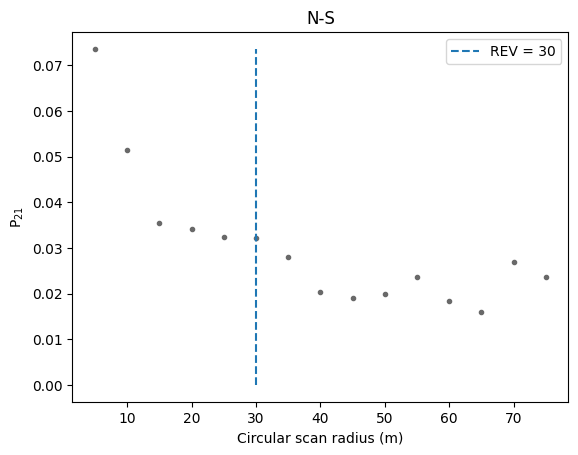

0.027590335579374476


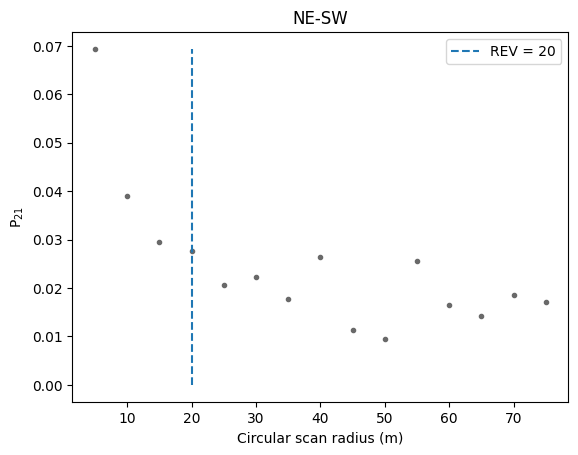

0.032484821156522195


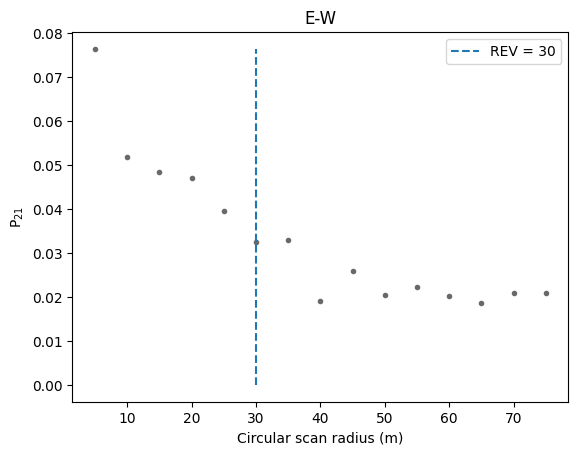

0.03378767418202321


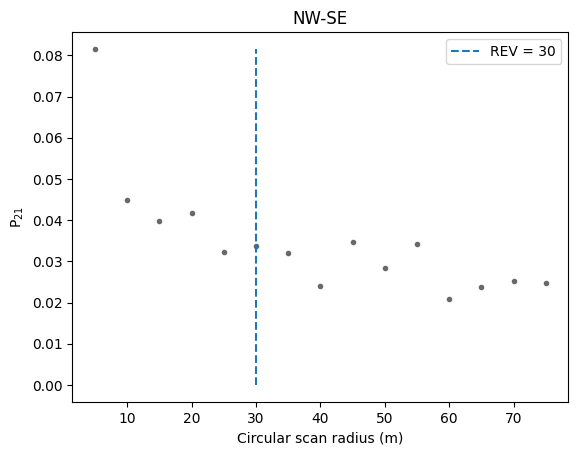

time: 11 s (started: 2024-06-06 19:12:50 -03:00)


In [405]:
'''
Esmaieli, K., Hadjigeorgiou, J., & Grenon, M. (2010). Estimating geometrical and mechanical REV based on synthetic rock mass models at Brunswick Mine. International Journal of Rock Mechanics and Mining Sciences, 47(6), 915–926. https://doi.org/10.1016/j.ijrmms.2010.05.010
Sari, M. (2021). Determination of representative elementary volume (REV) for jointed rock masses exhibiting scale-dependent behavior: a numerical investigation. International Journal of Geo-Engineering, 12(1). https://doi.org/10.1186/s40703-021-00164-1
Martinelli, M., Bistacchi, A., Mittempergher, S., Bonneau, F., Balsamo, F., Caumon, G., & Meda, M. (2020). Damage zone characterization combining scan-line and scan-area analysis on a km-scale Digital Outcrop Model: The Qala Fault (Gozo). Journal of Structural Geology, 140(July), 104144. https://doi.org/10.1016/j.jsg.2020.104144
Bagni, F. L., Bezerra, F. H., Balsamo, F., Maia, R. P., & Dall’Aglio, M. (2020). Karst dissolution along fracture corridors in an anticline hinge, Jandaíra Formation, Brazil: Implications for reservoir quality. Marine and Petroleum Geology, 115(October 2019), 104249. https://doi.org/10.1016/j.marpetgeo.2020.104249
'''

lines_ = np.copy(lines)
lines_[:, 0]  = lines_[:, 0] + x_offset
lines_[:, 1]  = lines_[:, 1] + y_offset
lines_[:, 2]  = lines_[:, 2] + x_offset
lines_[:, 3]  = lines_[:, 3] + y_offset


sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']

min_radius = 5
max_radius = 80
step = 5
radius_list_size = np.shape(list(range(min_radius, max_radius, step)))[0]
significance_level = 0.05

for set in sets:

    p21_data = []
    p21_mean = []
    for radius in range(min_radius, max_radius, step):
        p21_list = []
    
        segm_group_angles = compute_line_angles(lines_)


        if set == 'N-S':
            set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
        if set == 'NE-SW':
            set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'E-W':
            set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'NW-SE':
            set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

        
        p21_circular = compute_p_statistics_circular(lines_[set1 != np.array(None)], canvas, radius)
        p21_list = p21_circular[:, 2]

        p21_data.append(p21_list)
        p21_mean.append(np.median([j for j in p21_list if j != 0]))

    # p21_matrix = np.reshape(p21_mean, (20, 1000))

    REV = -1
    for i in range(radius_list_size):
        stats1 = scipy.stats.ttest_ind([j for j in p21_data[i] if j != 0], p21_data[-1])
        # print(stats1.pvalue)

        stats2 = scipy.stats.f_oneway([j for j in p21_data[i] if j != 0], p21_data[-1])
        # print(stats2.pvalue)

        if stats1.pvalue >= significance_level and stats2.pvalue > significance_level:
            if REV == -1:
                REV = i
                print(p21_mean[i])
        #     print('verdadeiro')
        # else:
        #     print('falso')
    
    plt.plot(list(range(min_radius, max_radius, step)), p21_mean, ".", color='dimgrey')
    plt.vlines((REV+1)*step, ymin=0, ymax=np.nanmax(p21_mean), linestyles='dashed', label='REV = '+ str((REV+1)*step)+'')
    plt.legend()
    plt.title(set)
    plt.xlabel('Circular scan radius (m)')
    plt.ylabel(r'P$_{21}$')
    plt.show()

### Estimating P21 per set

In [403]:
sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']
radius = 30

p21_mean = []
p21_data = []
for set in sets:

    # p21_list = []

    segm_group_angles = compute_line_angles(lines_)


    if set == 'N-S':
        set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
    if set == 'NE-SW':
        set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
    if set == 'E-W':
        set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
    if set == 'NW-SE':
        set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

    
    p21_circular = compute_p_statistics_circular(lines_[set1 != np.array(None)], canvas, radius)
    p21_list = p21_circular[:, 2]

    p21_data.append(p21_list)
    p21_mean.append(np.median([j for j in p21_list if j != 0]))

time: 281 ms (started: 2024-06-06 19:12:24 -03:00)


In [404]:
p21_mean

[0.032262027871280415,
 0.0222614044125016,
 0.032484821156522195,
 0.03378767418202321]

time: 0 ns (started: 2024-06-06 19:12:27 -03:00)


### Ploting rosecharts of datasets 2

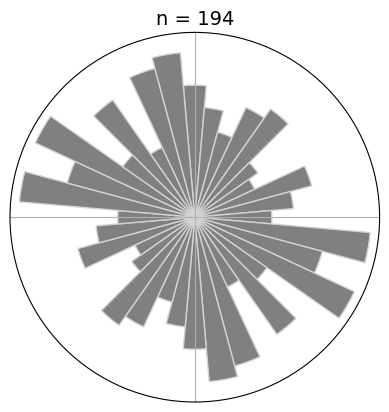

time: 469 ms (started: 2024-06-20 11:51:12 -03:00)


In [4]:
# Dataset 2
angles2 = compute_line_angles(segments_in_circle1)
rosechart_plot = rosechart(angles2[:, 0], filename='rosechart_dataset2.pdf') # angles[:, 0], angles[:, 1]

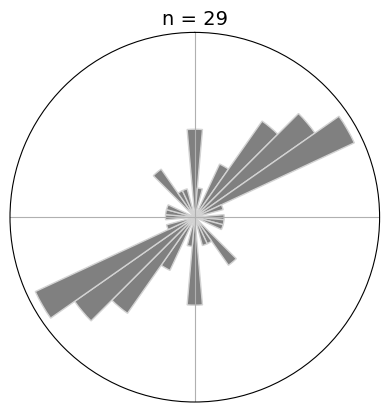

time: 157 ms (started: 2024-05-31 18:18:51 -03:00)


In [47]:
angles2 = compute_line_angles(segments_in_circle1)
aux = segm_group_angles[np.where(angles2[:, 1] > 10)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart_dataset2_10m.pdf')

### Ploting rosecharts of datasets 3

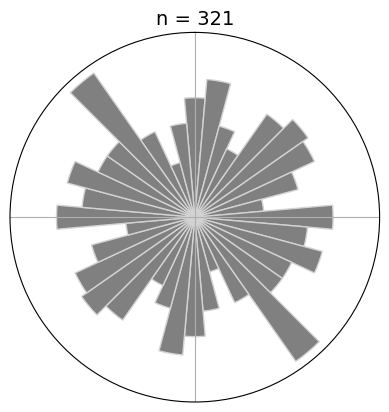

time: 156 ms (started: 2024-06-20 11:51:18 -03:00)


In [5]:
# Dataset 3
angles3 = compute_line_angles(segments_in_circle2)
rosechart_plot = rosechart(angles3[:, 0], filename='rosechart_dataset3.pdf')

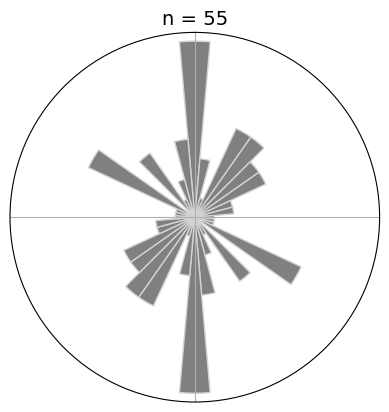

time: 157 ms (started: 2024-05-31 18:26:53 -03:00)


In [56]:
angles3 = compute_line_angles(segments_in_circle2)
aux = segm_group_angles[np.where(angles3[:, 1] > 10)]
rosechart_plot = rosechart(aux[:, 0], filename='rosechart_dataset3_10m.pdf')

# Tests with synthetic data

## SGD default settings

In [15]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3
n_seeds = 10

time: 0 ns (started: 2023-06-28 12:03:19 -03:00)


## SGD cost function evaluation

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


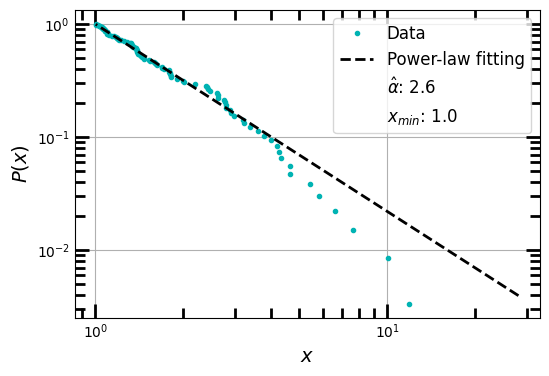

0.995063592745608 99.76 0.32 17.289267590729093 0.4037397922750372
>>> A2 cost function


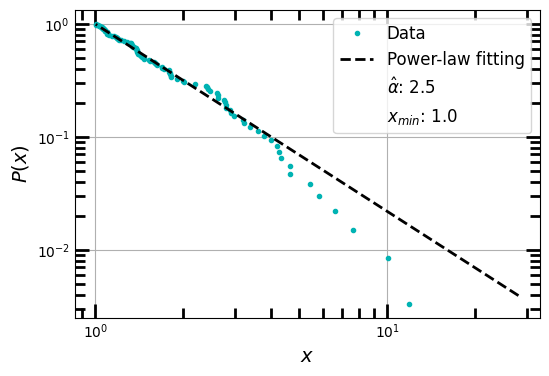

0.995065399397353 99.76 0.3 15.34575279196312 0.40496704691395746
>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


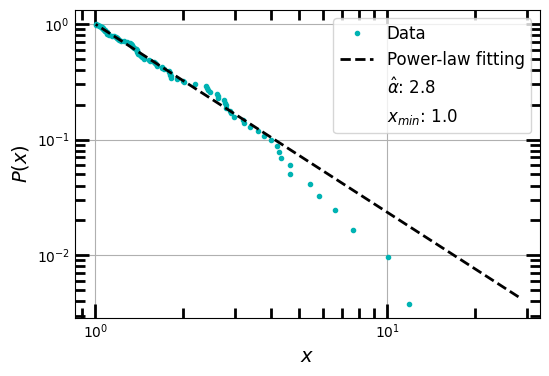

0.9950390356618005 94.39999999999999 0.58 43.70604018420196 0.39559829163195176
>>> KS cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


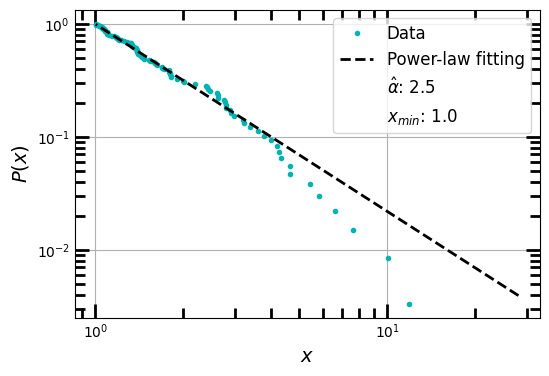

0.9950655796322533 99.72 0.3 15.357569102013704 0.40509425848612135
>>> KS_t cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


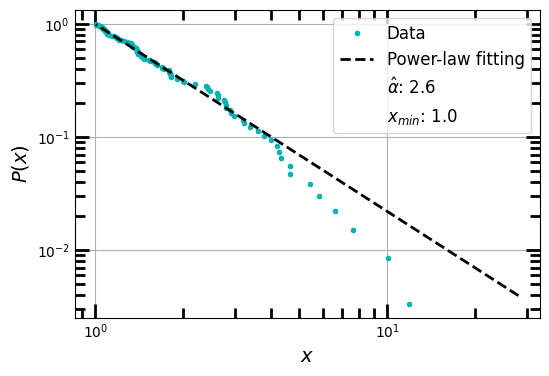

0.9950640649110868 99.76 0.31 16.61091954447181 0.40405214310664156
>>> KS_t_HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


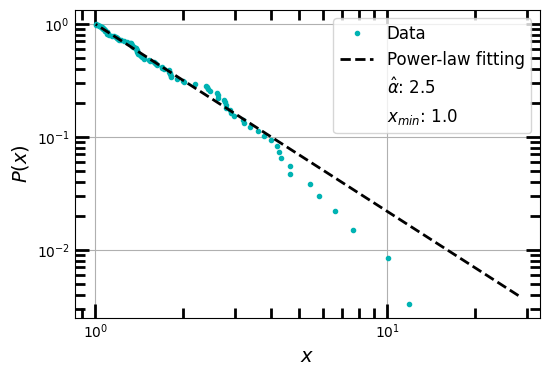

0.995065351612845 99.76 0.3 15.34575279196312 0.4049334658871295
time: 13min 30s (started: 2023-06-28 12:03:24 -03:00)


In [16]:
## Generating synthetic distribution
alpha = 2.5
xmin = 1
# np.random.seed(0)
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)


metric_results = []
fit = powerlaw.Fit(g, xmin=1)
xmin = fit.xmin
alpha = fit.power_law.alpha
r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha, xmin, ks_evaluation=True)
metric_results.append([alpha, r2, ks_t, ks_d, A2, HD])
print(r2, ks_t, ks_d, A2, HD)


for metric in ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']: # ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']

    print('>>> ' + metric + ' cost function')
    results = powerlaw_fit_SGD(g, max_iterations, learning_rate, n_seeds,
                              fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
    alpha_history, x_min_history, cost_history = results
    alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
    x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
    r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha_sgd, x_min_sgd, ks_evaluation=True, filename=metric+'_fitting.pdf')
    metric_results.append([alpha_sgd, r2, ks_t, ks_d, A2, HD])
    print(r2, ks_t, ks_d, A2, HD)
#     plot_history(n_seeds, cost_history, max_iterations, metric+'_history.pdf')



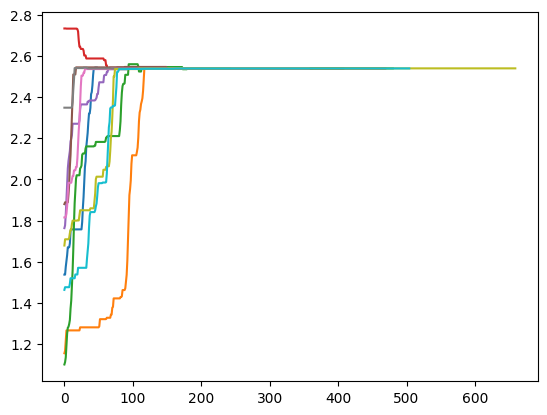

time: 157 ms (started: 2023-06-28 12:34:09 -03:00)


In [17]:
for i in range(n_seeds):
    plt.plot(alpha_history[i][np.where(alpha_history[i]>0)])

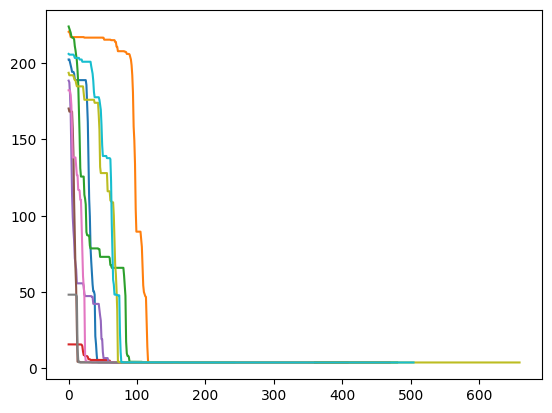

time: 188 ms (started: 2023-06-28 12:34:31 -03:00)


In [18]:
for i in range(n_seeds):
    plt.plot(cost_history[i])

In [19]:
#r2, ks_t, ks_d, A2, HD

metric_text = ['MLE', 'SGD A2', 'SGD HD', 'SGD K-S d', 'SGD K-S t', 'SGD K-S t+HD']

for i in range(6):
  print(metric_text[i], end=' & ')
  for j in range(np.size(metric_results[i])):
    if j != np.size(metric_results[i])-1:
      print(str("%.4f" % metric_results[i][j]), end=' & ')
    else:
      print(str("%.4f" % metric_results[i][j]), end=' \\\ \\hline \n ')

MLE & 2.5571 & 0.9951 & 99.7600 & 0.3200 & 17.2893 & 0.4037 \\ \hline 
 SGD A2 & 2.5394 & 0.9951 & 99.7600 & 0.3000 & 15.3458 & 0.4050 \\ \hline 
 SGD HD & 2.8480 & 0.9950 & 94.4000 & 0.5800 & 43.7060 & 0.3956 \\ \hline 
 SGD K-S d & 2.5377 & 0.9951 & 99.7200 & 0.3000 & 15.3576 & 0.4051 \\ \hline 
 SGD K-S t & 2.5524 & 0.9951 & 99.7600 & 0.3100 & 16.6109 & 0.4041 \\ \hline 
 SGD K-S t+HD & 2.5399 & 0.9951 & 99.7600 & 0.3000 & 15.3458 & 0.4049 \\ \hline 
 time: 0 ns (started: 2023-06-28 12:34:48 -03:00)


### Evaluating cost functions 10 times to obtain average values

2.632833604818021 0.9947123748919959 98.76 0.36 3.5044868013576176 0.40577146412075904
>>> A2 cost function
2.630483747552126 0.9947406290559329 99.72 0.26 5.89013500776779 0.3927604030857571


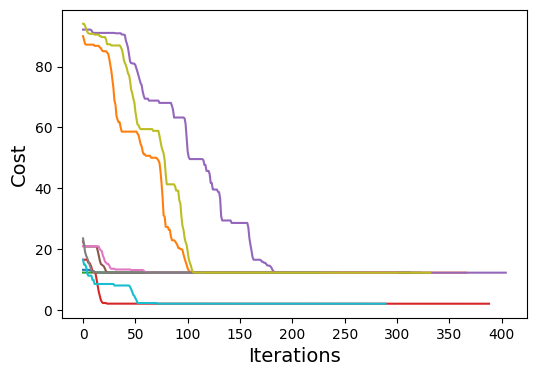

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.8774573570065427 0.9948037661253649 97.2 0.42 23.73622491932183 0.3852237129253116


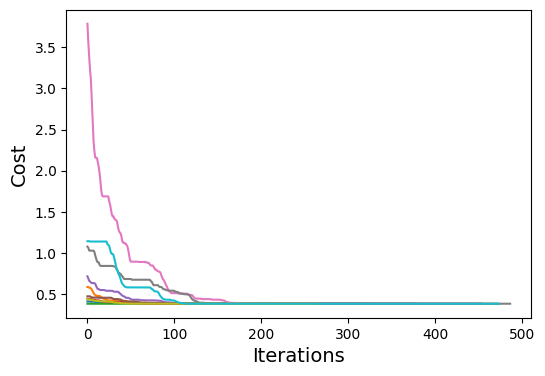

>>> KS cost function
2.611208639994641 0.994736169590656 99.72 0.25 4.880269865981889 0.39418259969162345


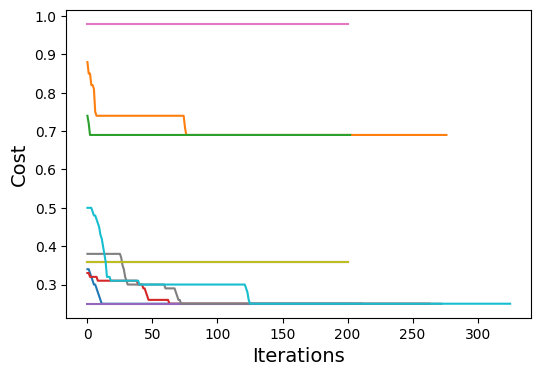

>>> KS_t cost function
2.621048820387949 0.994738435160836 99.76 0.26 5.365363281537144 0.393437350907027


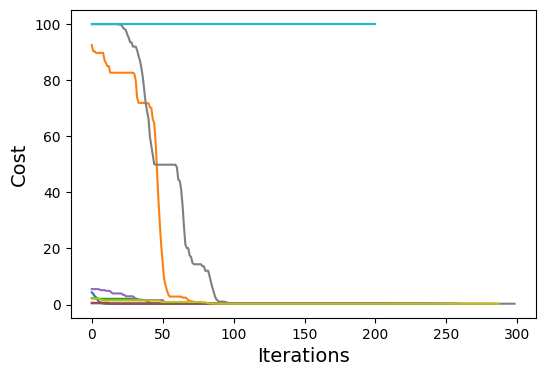

>>> KS_t_HD cost function
2.630661402321164 0.9947406705651073 99.72 0.26 5.89013500776779 0.39274800300160223


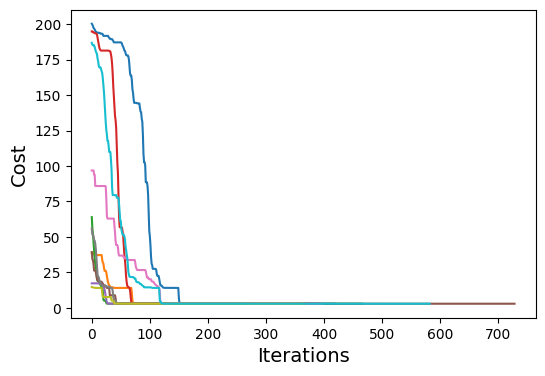

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.5818788426188135 0.9970103830166304 99.56 0.53 7.448939387538666 0.38562150794813194
>>> A2 cost function
2.684009006889033 0.997008557805557 99.44 0.28 10.545404310399887 0.37451377933777136


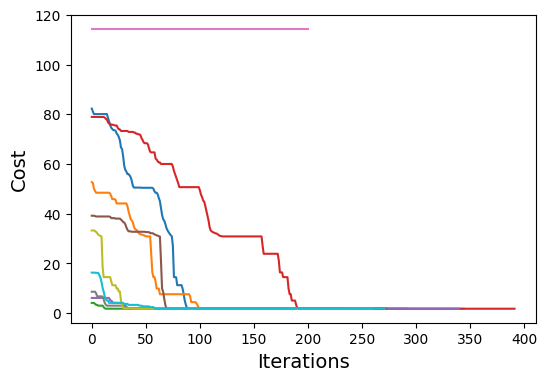

>>> HD cost function
2.7572582013202545 0.9970092952193198 98.92 0.32 15.416094854120999 0.37374285924440415


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


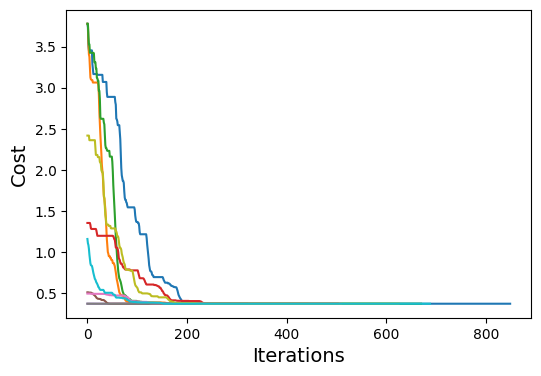

>>> KS cost function
2.425977960765353 0.9970129292672756 98.88 0.53 8.440112013289333 0.3953131361265945


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


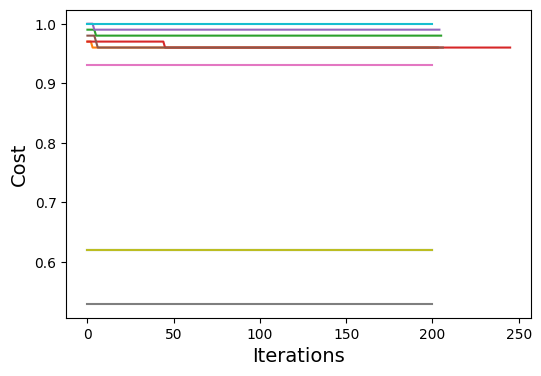

>>> KS_t cost function
2.5885000464404953 0.9970087759479961 99.8 0.43 5.709446128869583 0.37833207120764895


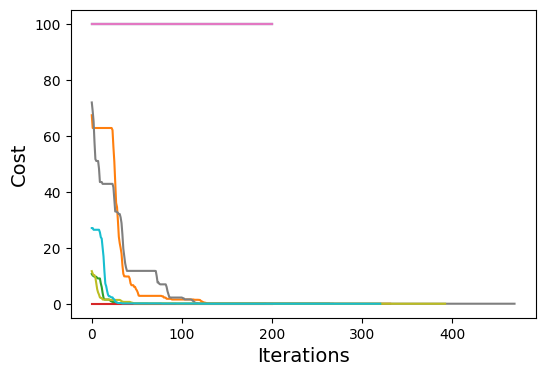

>>> KS_t_HD cost function
2.6763598248543614 0.9970085234048397 99.52 0.29 10.049050784331392 0.3746917955458211


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


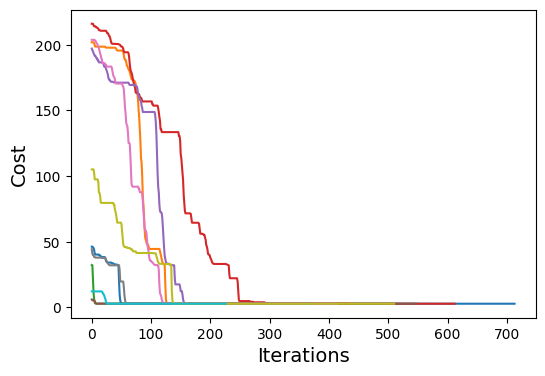

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.744492764802348 0.9895134621023817 86.36 0.28 12.310715703510963 0.44522073420177427
>>> A2 cost function
2.4705584390857993 0.9894844713867614 82.96 0.27 9.67499649144782 0.44929174788727533


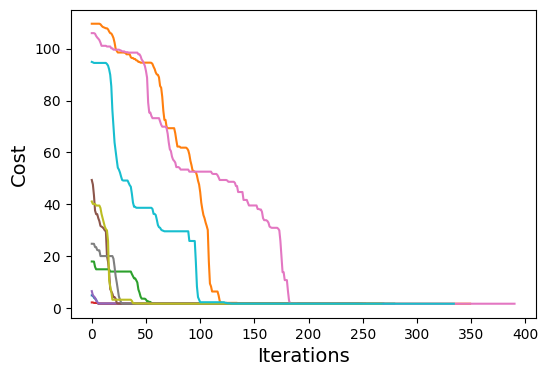

>>> HD cost function
3.402172403376891 0.9901993218689751 65.88000000000001 0.79 74.36057262803138 0.40682162467119753


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


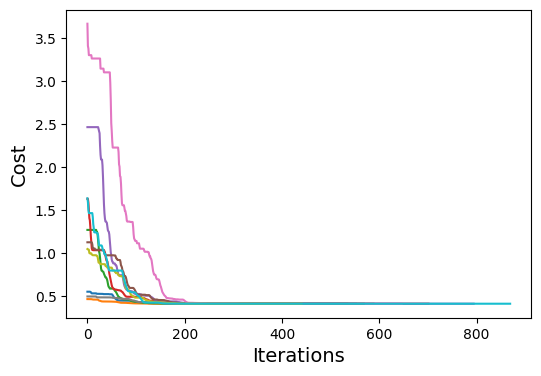

>>> KS cost function
2.4819829203864794 0.9894957550284372 84.36 0.25 10.658357895997122 0.44767045683680023


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


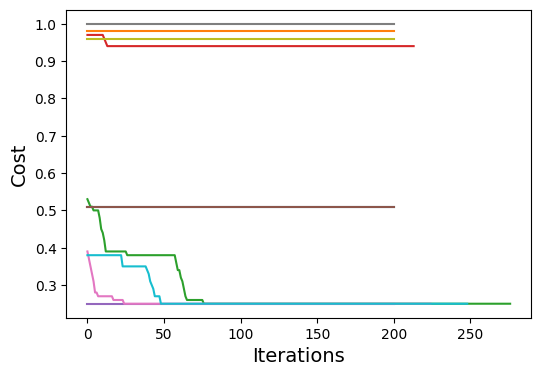

>>> KS_t cost function
2.768658316762847 0.989761472018763 98.8 0.55 36.90540703435523 0.42071723492182916


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


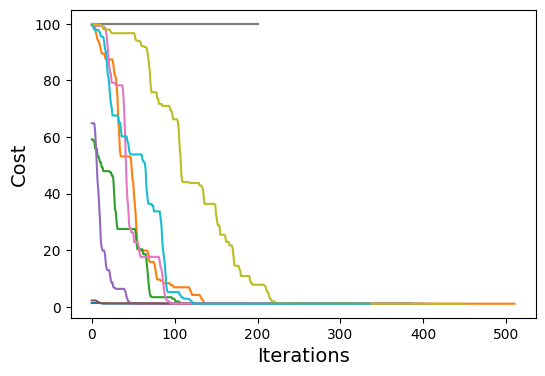

>>> KS_t_HD cost function
2.5630529923867593 0.9895745035239681 92.75999999999999 0.36 17.766510361341663 0.43759651285621237


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


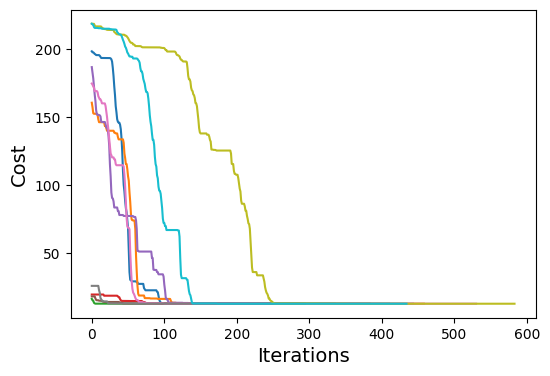

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.7491013003222315 0.9920307337214707 94.16 0.41 10.532854079941972 0.3327445117597287
>>> A2 cost function
2.8672322079671937 0.992064903687116 96.2 0.23 2.864784452053065 0.26816185389279035


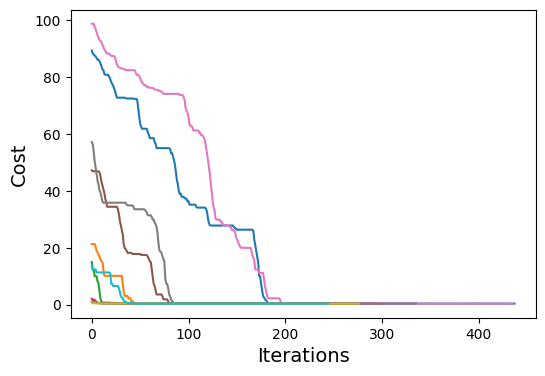

>>> HD cost function
2.9510861449123036 0.9920859911941208 93.4 0.3 6.620952295519327 0.26646517549158844


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


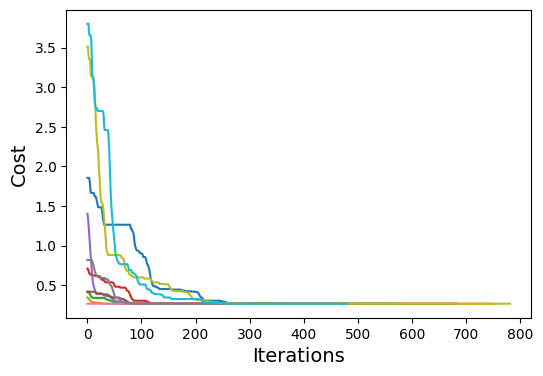

>>> KS cost function
2.7743147712266323 0.9920465455053663 98.04 0.15 1.0126350667957635 0.2746736872686383


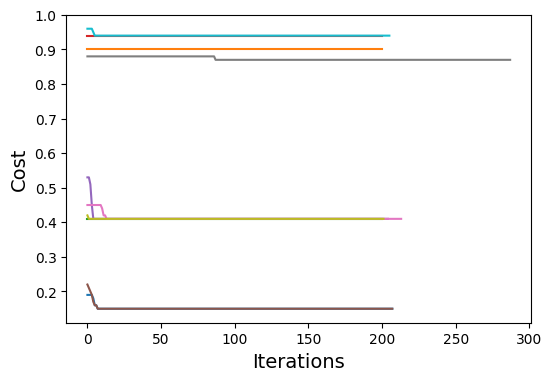

>>> KS_t cost function
2.671103469025818 0.9920332646831499 98.68 0.26 0.7580150064860516 0.2889422612510273


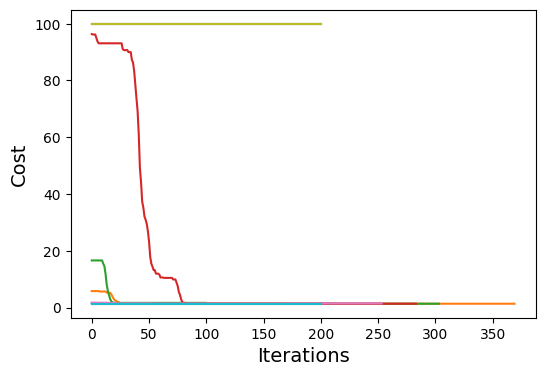

>>> KS_t_HD cost function
2.7491586515372166 0.9920425793125017 98.52 0.17 0.5891170549156896 0.277415057337445


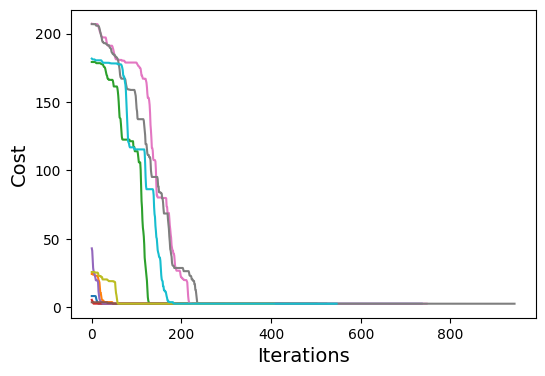

2.483814582625407 0.9875913661992963 95.8 0.23 0.7124393846379822 0.3036913943801444
>>> A2 cost function
2.729446410368329 0.9878080038542285 80.56 0.23 3.6547478862179137 0.30233448994172296


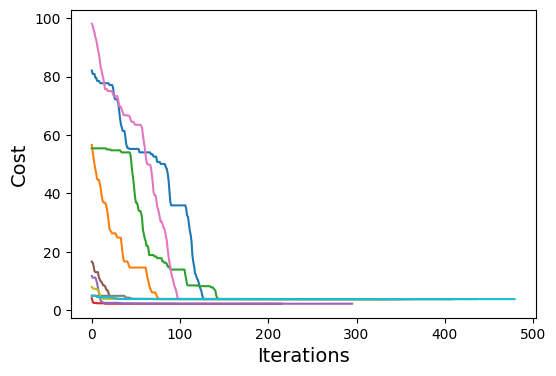

>>> HD cost function
2.6160466774479154 0.9877001935693466 89.64 0.23 1.4970961726838614 0.29880222882128926


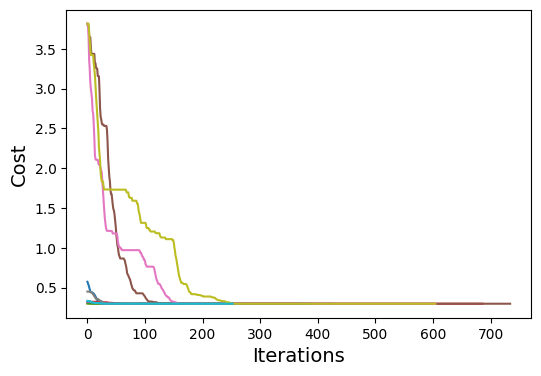

>>> KS cost function
2.6969923904558324 0.9877770938969572 83.2 0.21 2.5895020457840783 0.3006761632637333


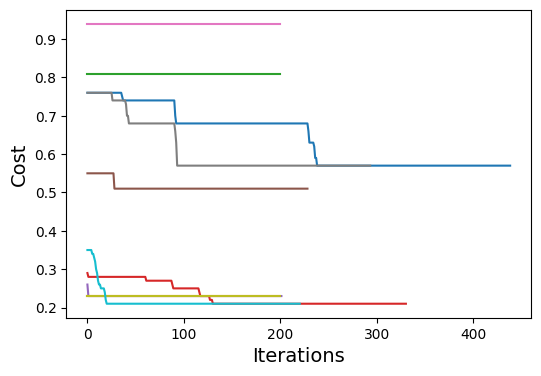

>>> KS_t cost function
2.3984998493555496 0.9874988732104159 98.04 0.31 3.202744352677134 0.31805430570046234


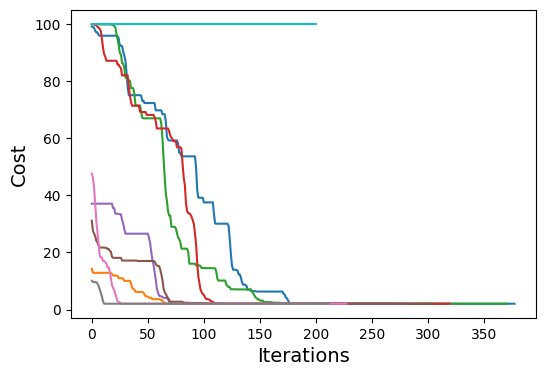

>>> KS_t_HD cost function
2.4576550795886587 0.9875523876613694 97.32 0.25 1.4832687529958577 0.30836332101786607


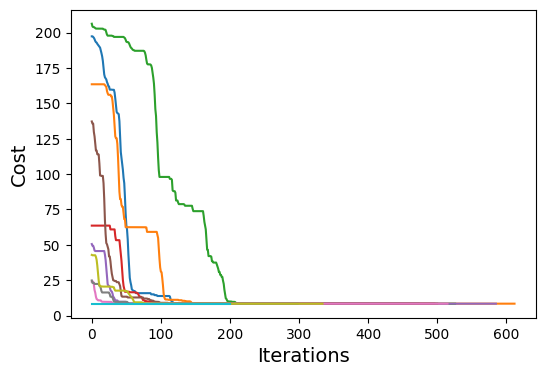

2.5044237848374706 0.9975074046423706 99.6 0.27 1.0135964771578285 0.36330119140023087
>>> A2 cost function
2.6628819392893166 0.997466224613675 99.56 0.23 4.2475668612855015 0.35882029074549837


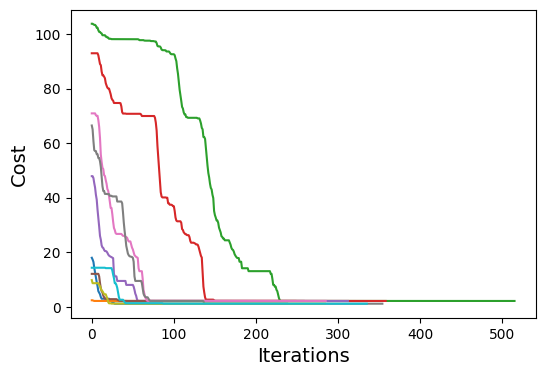

>>> HD cost function
2.6357046868525424 0.9974730272167914 99.68 0.21 3.336162789917104 0.35866907990878966


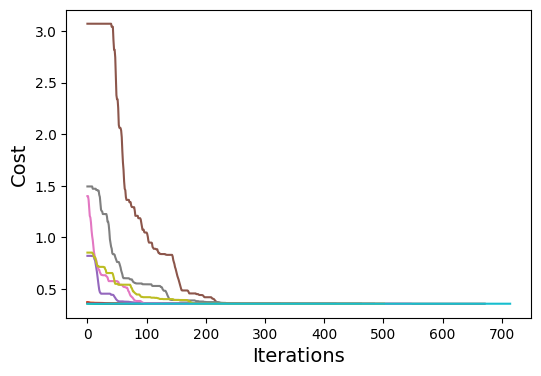

>>> KS cost function
2.5982624339694227 0.9974824452753843 99.76 0.17 2.525036866837318 0.35898043586752504


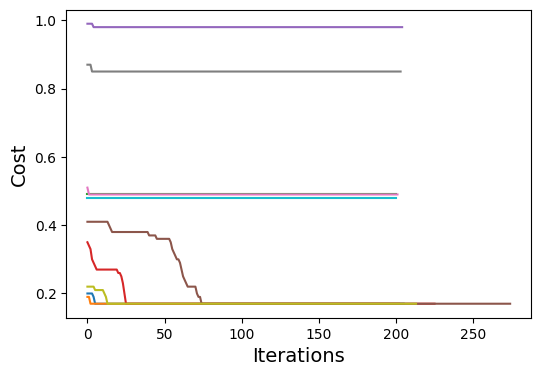

>>> KS_t cost function
2.5446689050178524 0.9974960159578325 99.83999999999999 0.21 1.2563407046891062 0.3606390073517364


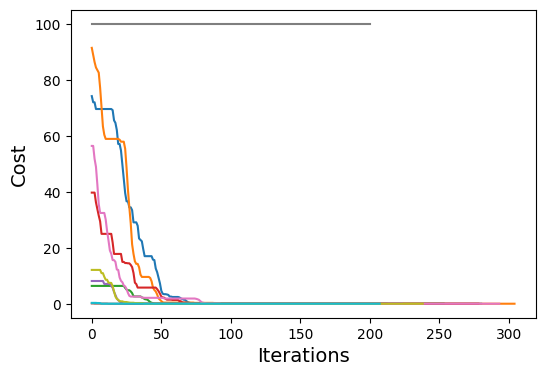

>>> KS_t_HD cost function
2.651212615340067 0.9974691420108669 99.64 0.22 3.7950813714753995 0.3587190459728869


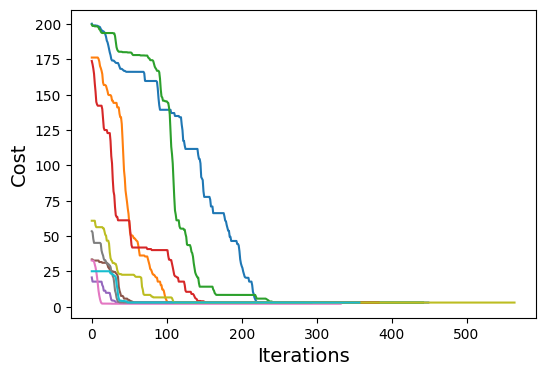

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.4233825078867324 0.991561728788189 97.56 0.34 15.879017696485029 0.39493627633152334
>>> A2 cost function
2.387209256938426 0.9915082489872189 99.03999999999999 0.26 5.164295394162104 0.40379430998121313


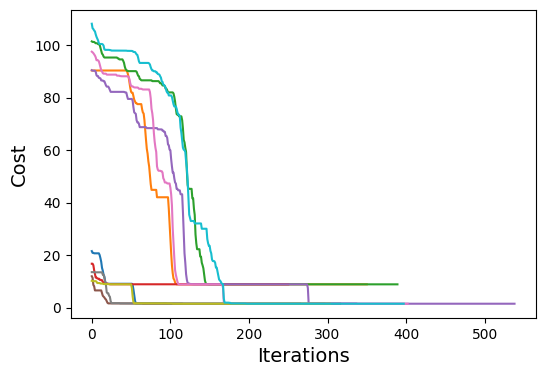

>>> HD cost function
2.7235681775498835 0.9916877806295262 83.2 0.54 36.57042053585249 0.38954159648525927


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


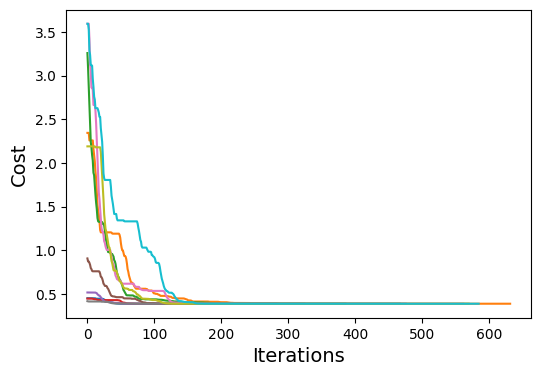

>>> KS cost function
2.365438383274375 0.9914990883706195 99.16 0.25 4.072172307490038 0.4062016349765758


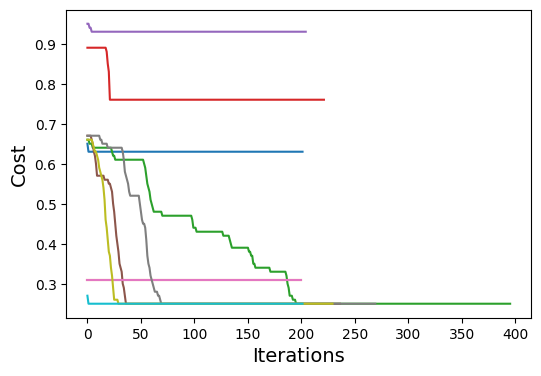

>>> KS_t cost function
2.363299177799957 0.9914982114453462 99.16 0.25 3.9888326941052905 0.4064523068942837


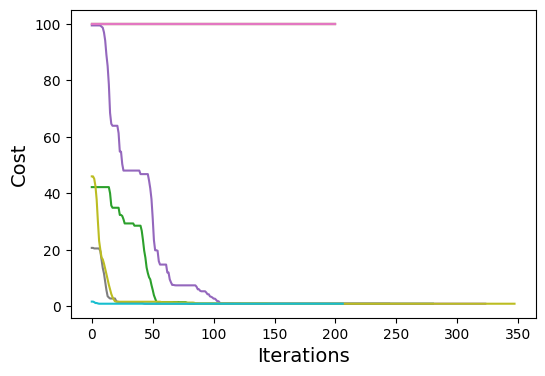

>>> KS_t_HD cost function
2.3875887368848203 0.9915084123863346 99.03999999999999 0.26 5.164295394162104 0.4037546087043527


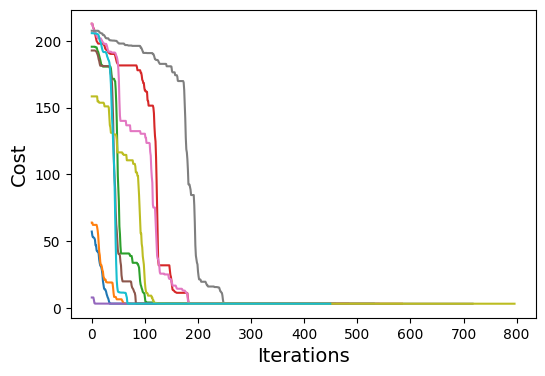

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.5500350938439302 0.986927664087259 97.52 0.41 6.786552365427421 0.2650766375105447
>>> A2 cost function
2.7450628258814316 0.987170692491797 83.67999999999999 0.29 1.5897562476767595 0.2527748780056107


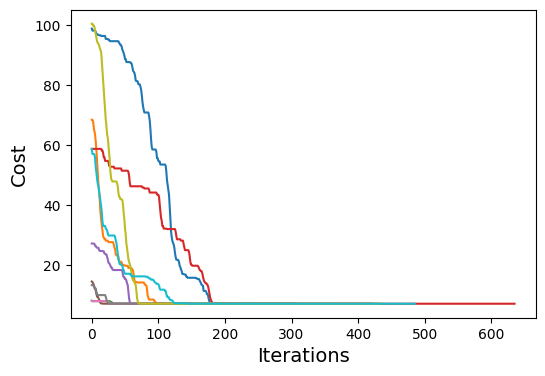

>>> HD cost function
2.6700221344036086 0.9870960238299008 90.28 0.29 1.7476292026589033 0.2506113611570529


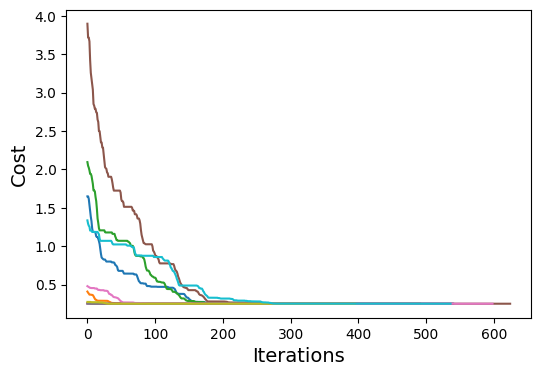

>>> KS cost function
2.615741692907103 0.9870420546271342 93.12 0.29 2.629851011997259 0.2519251402229526


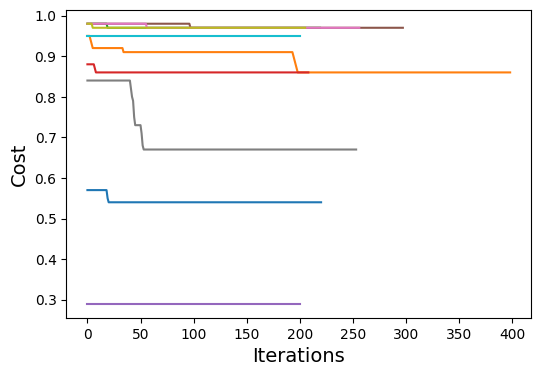

>>> KS_t cost function
2.421965091997432 0.9868515478956672 98.2 0.41 8.65083208064104 0.2834868195698147


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


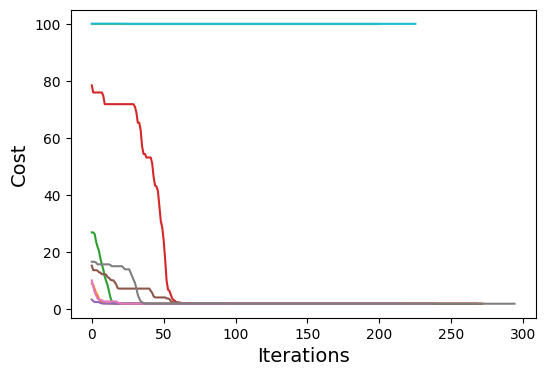

>>> KS_t_HD cost function
2.5931684788751905 0.987019651604921 94.19999999999999 0.31 3.219797475329998 0.253309214707094


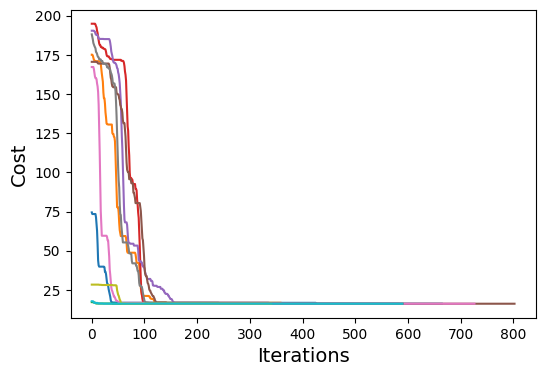

2.509363455228458 0.9909004426047279 99.24 0.24 3.2492634249168955 0.3474641556555279
>>> A2 cost function
2.4026504392278127 0.9908145544929311 98.6 0.19 0.8241934352653691 0.36061731519133716


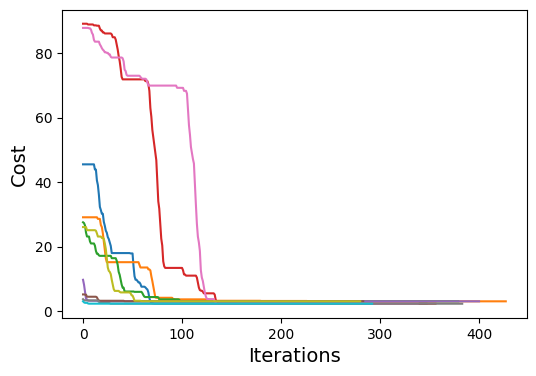

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.72097025970132 0.9910992966375762 94.28 0.38 15.793900197943357 0.3376196014071473


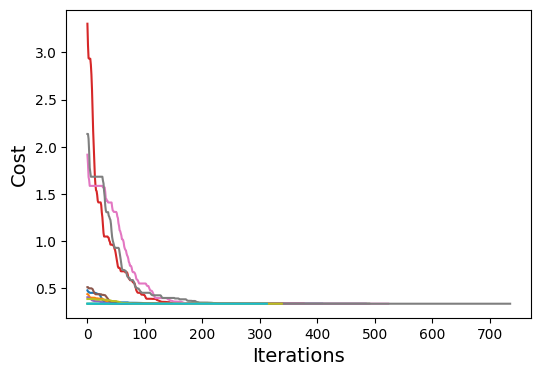

>>> KS cost function
2.4357369547218526 0.9908434941605535 98.92 0.19 1.4489476751689931 0.3553579772403338


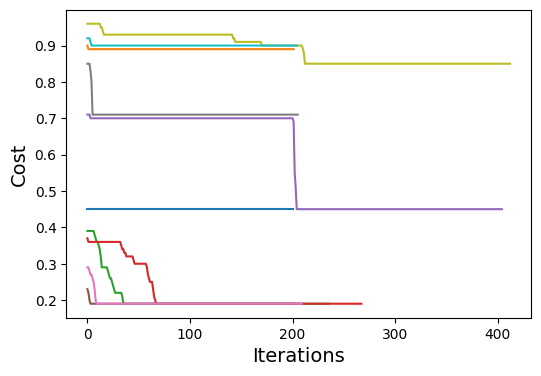

>>> KS_t cost function
2.4697450043440647 0.9908735263616884 99.4 0.21 2.2778707259338247 0.3508223862589991


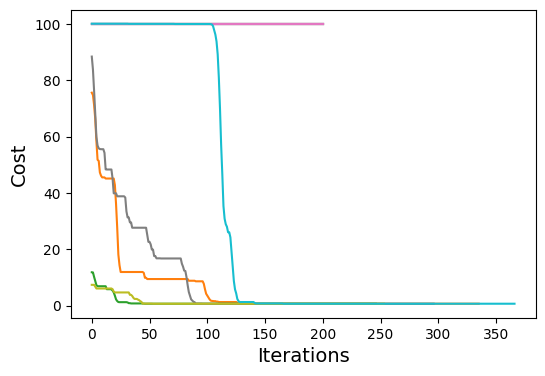

>>> KS_t_HD cost function
2.450323766314697 0.9908563433972046 99.24 0.19 1.719598381961964 0.3533092353090576


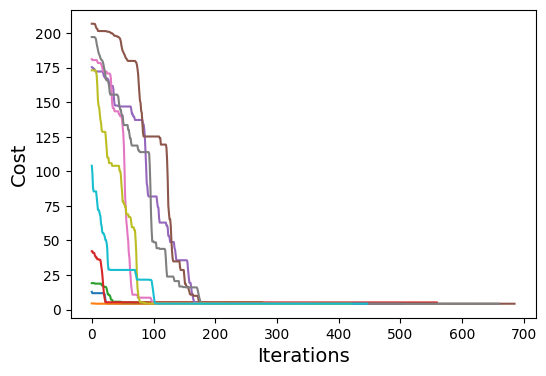

2.6523420807823364 0.9951612476425233 98.24000000000001 0.34 2.357197703018535 0.376602613550356
>>> A2 cost function
2.7720762464703954 0.9952552119904993 98.52 0.22 4.541037755745985 0.34914721753196987


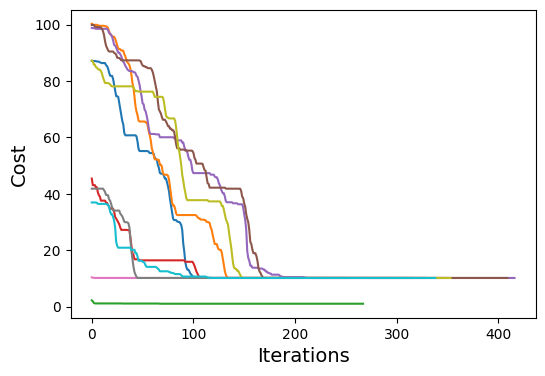

>>> HD cost function


C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:411: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), Y_], midrank=False)[0]


2.865587823955037 0.9952880590365184 96.64 0.27 9.722954631809298 0.3477395868289099


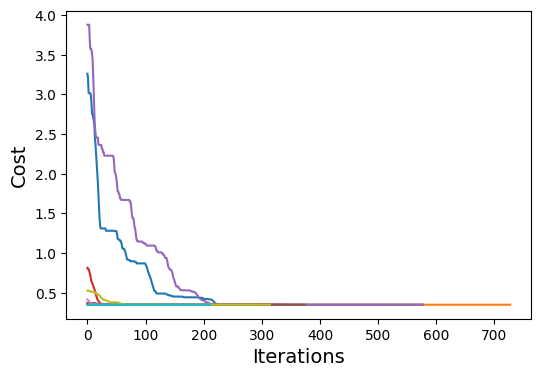

>>> KS cost function
2.7700021921778863 0.9952544829411951 98.52 0.22 4.296784048598088 0.34921365565266244


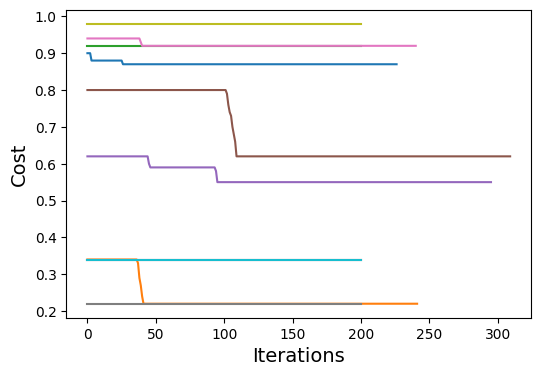

>>> KS_t cost function
2.6805076284731215 0.9952231021325227 99.56 0.34 2.9092682645520695 0.35382943847085685


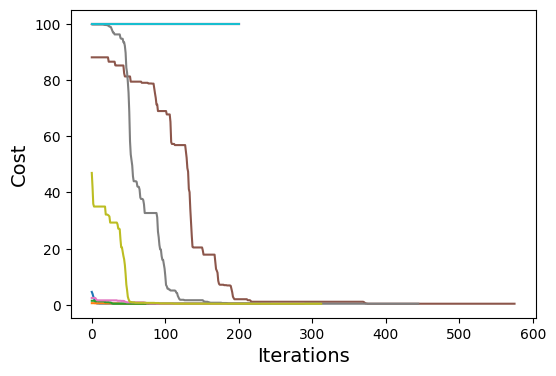

>>> KS_t_HD cost function
2.7506597043110896 0.9952476858166636 98.92 0.23 3.6343494964012413 0.34991570353415136


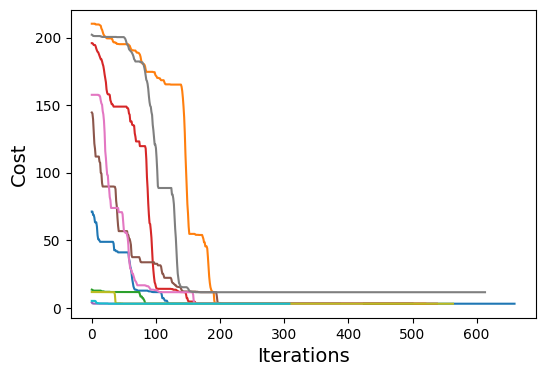

time: 2h 42min 11s (started: 2023-06-28 12:55:44 -03:00)


In [20]:
learning_rate = 0.02
max_iterations = 1000
momentum=0.3
n_seeds = 10



n = 10
metrics = ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']
metric_results = np.zeros((n, 6, 6))

alpha = 2.5
xmin = 1

for i in range(n):

  j = 0
  
  np.random.seed(i)
  r = np.random.uniform(0.0, 1.0, size=100)
  power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
  g = np.sort(power)

  fit = powerlaw.Fit(g, xmin=xmin)
  xmin = fit.xmin
  alpha_mle = fit.power_law.alpha
  r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha, xmin, ks_evaluation=True, plot=False)
  metric_results[i, j] = alpha_mle, r2, ks_t, ks_d, A2, HD
  print(alpha_mle, r2, ks_t, ks_d, A2, HD)


  for metric in metrics: # ['A2', 'HD', 'KS', 'KS_t', 'KS_t_HD']
    j += 1
    print('>>> ' + metric + ' cost function')
    results = powerlaw_fit_SGD(g, max_iterations, learning_rate, n_seeds,
                              fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
    alpha_history, x_min_history, cost_history = results
    
    alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
    x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
    r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha_sgd, x_min_sgd, ks_evaluation=True, plot=False, filename=metric+'_fitting.pdf')
    print(alpha_sgd, r2, ks_t, ks_d, A2, HD)
    metric_results[i, j] = alpha_sgd, r2, ks_t, ks_d, A2, HD
    plot_history(n_seeds, cost_history, max_iterations, metric+'_history.pdf')

In [22]:
mean_results = np.mean(metric_results, axis=0)

metric_text = ['MLE', 'SGD A2', 'SGD HD', 'SGD K-S d', 'SGD K-S t', 'SGD K-S t+HD']

for i in range(6):
  print(metric_text[i], end=' & ')
  for j in range(np.size(mean_results[i])):
    if j != np.size(mean_results[i])-1:
      print(str("%.3f" % mean_results[i][j]), end=' & ')
    else:
      print(str("%.3f" % mean_results[i][j]), end=' \\\ \\hline \n ')

MLE & 2.583 & 0.992 & 96.680 & 0.341 & 6.380 & 0.362 \\ \hline 
 SGD A2 & 2.635 & 0.992 & 93.828 & 0.246 & 4.900 & 0.351 \\ \hline 
 SGD HD & 2.822 & 0.992 & 90.912 & 0.375 & 18.880 & 0.342 \\ \hline 
 SGD K-S d & 2.578 & 0.992 & 95.368 & 0.251 & 4.255 & 0.353 \\ \hline 
 SGD K-S t & 2.553 & 0.992 & 99.124 & 0.323 & 7.102 & 0.355 \\ \hline 
 SGD K-S t+HD & 2.591 & 0.992 & 97.888 & 0.254 & 5.331 & 0.351 \\ \hline 
 time: 0 ns (started: 2023-06-28 15:42:30 -03:00)


### Evaluating optimizations with execution time

In [15]:
from IPython import display

time: 0 ns (started: 2023-06-23 09:58:22 -03:00)


In [42]:
learning_rate = 0.05
max_iterations = 500
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

1 Single 0.8200321197509766
1 Multi 2.4526801109313965
1 Single 0.8739941120147705
1 Multi 2.2499656677246094
1 Single 0.7556602954864502
1 Multi 2.188908815383911
1 Single 0.8055992126464844
1 Multi 2.329618453979492
1 Single 0.8289251327514648
1 Multi 2.251711130142212
1 Single 0.8543548583984375
1 Multi 2.190129518508911
1 Single 0.7624480724334717
1 Multi 2.1574816703796387
1 Single 0.8257756233215332
1 Multi 2.3541719913482666
1 Single 0.8152716159820557
1 Multi 2.43230938911438
1 Single 0.9465150833129883
1 Multi 2.2179770469665527
2 Single 1.5871541500091553
2 Multi 2.5389201641082764
2 Single 1.6432225704193115
2 Multi 2.482330799102783
2 Single 1.5315301418304443
2 Multi 2.4201042652130127
2 Single 1.7767469882965088
2 Multi 2.548147439956665
2 Single 1.561147928237915
2 Multi 2.492271900177002
2 Single 1.560053825378418
2 Multi 2.4853546619415283
2 Single 1.5659031867980957
2 Multi 2.5376667976379395
2 Single 1.6626102924346924
2 Multi 2.4503676891326904
2 Single 1.5795485973

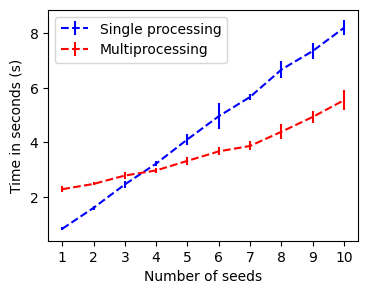

time: 156 ms (started: 2023-07-03 20:22:15 -03:00)


In [45]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')

ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.show()

In [46]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

1 Single 1.4865412712097168
1 Multi 2.91975736618042
1 Single 1.4704854488372803
1 Multi 2.797701120376587
1 Single 1.749741792678833
1 Multi 3.3580572605133057
1 Single 1.8347299098968506
1 Multi 3.1669580936431885
1 Single 1.6448330879211426
1 Multi 2.842386484146118
1 Single 1.4297010898590088
1 Multi 2.966602325439453
1 Single 1.4444115161895752
1 Multi 2.955836534500122
1 Single 1.4585163593292236
1 Multi 2.8429551124572754
1 Single 1.4319384098052979
1 Multi 2.856748342514038
1 Single 1.4401874542236328
1 Multi 2.800934314727783
2 Single 3.0549724102020264
2 Multi 3.289919137954712
2 Single 2.8789939880371094
2 Multi 3.0993704795837402
2 Single 3.0913825035095215
2 Multi 3.3552544116973877
2 Single 2.9276397228240967
2 Multi 3.2521233558654785
2 Single 3.1233580112457275
2 Multi 3.108401298522949
2 Single 2.995502471923828
2 Multi 3.255331039428711
2 Single 3.0138282775878906
2 Multi 3.22548770904541
2 Single 3.0403146743774414
2 Multi 3.3121516704559326
2 Single 3.38036084175109

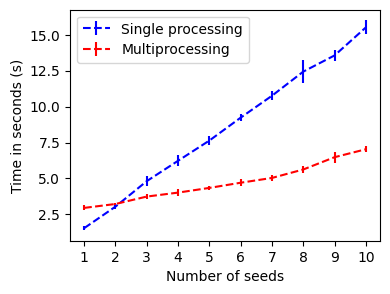

time: 172 ms (started: 2023-07-03 20:46:40 -03:00)


In [47]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')

ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.show()

In [52]:
learning_rate = 0.05
max_iterations = 50
momentum=0.3

alpha = 2.5
xmin = 1
r = np.random.uniform(0.0, 1.0, size=100)
power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
g = np.sort(power)

# 
time_singleprocessing = []
time_multiprocessing = []

metric = 'KS_t'

max_seed = 11
n = 10

for i in range(1,max_seed):
    for j in range(n):
        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=False, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Single ' + str(execution_time))
        time_singleprocessing.append(execution_time)

        start_time = time()
        results = powerlaw_fit_SGD(g, max_iterations, learning_rate, i,
                                  fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=False)
        execution_time = time() - start_time
        print(str(i) + ' Multi ' + str(execution_time))
        time_multiprocessing.append(execution_time)
singleprocessing = np.reshape(time_singleprocessing, (max_seed-1, n))
multiprocessing = np.reshape(time_multiprocessing, (max_seed-1, n))

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:656: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(P), S], midrank=True)[0]


1 Single 11.36610460281372
1 Multi 11.865104913711548
1 Single 10.325541019439697
1 Multi 11.658733606338501
1 Single 10.312756538391113
1 Multi 11.594953060150146
1 Single 10.261395931243896
1 Multi 12.4411780834198
1 Single 12.493001222610474
1 Multi 12.992573738098145
1 Single 11.195931434631348
1 Multi 11.92133092880249
1 Single 10.097379207611084
1 Multi 11.893183469772339
1 Single 10.616013050079346
1 Multi 12.099799156188965
1 Single 10.471288681030273
1 Multi 11.765389919281006
1 Single 10.655631065368652
1 Multi 13.205651044845581
2 Single 21.71924114227295
2 Multi 13.498826742172241
2 Single 21.060988426208496
2 Multi 13.185334205627441
2 Single 20.892655611038208
2 Multi 13.499622344970703
2 Single 22.62527871131897
2 Multi 13.577173471450806
2 Single 21.17272114753723
2 Multi 14.952935457229614
2 Single 21.872076511383057
2 Multi 13.257277011871338
2 Single 21.6483736038208
2 Multi 14.364122152328491
2 Single 21.524251461029053
2 Multi 14.258623600006104
2 Single 20.5100777

C:\Users\adejunior\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:545: RuntimeWarning: overflow encountered in power
  power = lambda r: xmin*np.power((1-r),(-1/(alpha-1)), dtype=np.float64)# Equation D.4 from Clauset, 2009


5 Single 55.83634281158447
5 Multi 18.268919467926025
5 Single 55.51499271392822
5 Multi 18.81415033340454
5 Single 52.66882586479187
5 Multi 17.610880136489868
6 Single 64.48594808578491
6 Multi 20.613743543624878
6 Single 63.759663820266724
6 Multi 19.26431918144226
6 Single 62.79995942115784
6 Multi 20.140888214111328
6 Single 64.33622908592224
6 Multi 19.4747052192688
6 Single 64.45591449737549
6 Multi 19.95441198348999
6 Single 62.1207013130188
6 Multi 22.4197678565979
6 Single 63.91344165802002
6 Multi 19.200806856155396
6 Single 63.29231071472168
6 Multi 19.175196647644043
6 Single 65.28930735588074
6 Multi 19.456719398498535
6 Single 63.68095088005066
6 Multi 19.702660083770752
7 Single 75.28152680397034
7 Multi 21.536343336105347
7 Single 76.03165912628174
7 Multi 22.54501223564148
7 Single 76.53524208068848
7 Multi 22.073720455169678
7 Single 79.14448022842407
7 Multi 21.155240535736084
7 Single 75.39358472824097
7 Multi 22.625556230545044
7 Single 74.50943779945374
7 Multi 2

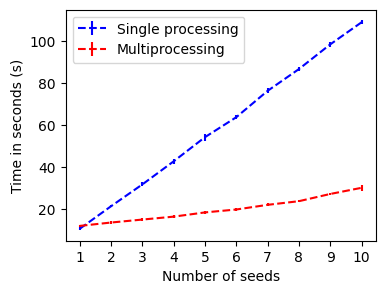

time: 219 ms (started: 2023-07-03 23:10:55 -03:00)


In [53]:
fig, ax = plt.subplots(figsize=(4,3))
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(singleprocessing, axis=1), yerr = np.std(singleprocessing, axis=1),label='Single processing', linestyle="--", color='blue')
ax.errorbar(x = list(range(0,max_seed-1)), y = np.mean(multiprocessing, axis=1), yerr = np.std(multiprocessing, axis=1), label='Multiprocessing', linestyle="--", color='red')
ax.set_xlabel('Number of seeds')
ax.set_ylabel('Time in seconds (s)')
ax.set_xticks(list(range(0,max_seed-1)), list(range(1,max_seed)))
ax.legend()
plt.savefig('execution_time3_.pdf')
plt.show()

In [ ]:
# for i in range(n_seeds):
#   plt.plot(cost_history[i*max_iterations:i*max_iterations + max_iterations])
#   index = (i)*max_iterations + max_iterations-1
#   print(alpha_history[index], x_min_history[index], cost_history[index])

In [ ]:
learning_rate = 0.05
max_iterations = 1000
momentum=0.3
n_seeds = 100

set1 = np.where((angles2[:, 0] > 20) & (angles2[:, 0] <= 90) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set1 = angles2[set1 != np.array(None)]

results = powerlaw_fit_SGD(set1[:,1], max_iterations, learning_rate, n_seeds,
                              fix_x_min=None, metric = 'KS_t', multiprocessing=True, early_stopping=False)

alpha_history, x_min_history, cost_history = results
alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]



In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))

ax.tricontourf(x_min_history.flatten(),
             alpha_history.flatten(),
             cost_history.flatten(), 10,
             cmap='OrRd')

# ax.scatter(x_min_history.flatten(),
#             alpha_history.flatten(),
#             c=np.log10(cost_history.flatten()),
#           #  c='k',
#             cmap='OrRd') # 'copper'

# for i in range(n_seeds):
#   ax.plot(x_min_history[i],
#           alpha_history[i],
#           c='gray')

ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r"$\alpha$",fontsize=16)

plt.show()

## Estimating attribute distributions of synthetic data

In [695]:
alpha = 2.5
xmin = 1

time: 0 ns (started: 2024-06-11 19:14:31 -03:00)


In [700]:
learning_rate = 0.1
max_iterations = 1000
momentum=0.5
n_seeds = 20

time: 0 ns (started: 2024-06-11 19:26:00 -03:00)


In [707]:
n = 10
statistics_mle = []
statistics_sgd = []

metric = 'KS_t'

seed_random = 3
for alpha in [2.5]: # 1.7, 2.0, 2.3, 2.5
    for xmin in [1]:
        for i in range(0, n):
            r = np.random.default_rng(seed_random*2).uniform(0.00, 1.0, size=500)
            power = xmin*(1-r)**(-1/(alpha-1)) # Equation D.4 from Clauset, 2009
            g = np.sort(power)
            # g = generate_powerlaw_data(alpha, xmin, 100, random=True)
            
            fit = powerlaw.Fit(g, xmin=xmin)
#             xmin_mle = fit.xmin
            alpha_mle = fit.power_law.alpha
            r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha_mle, xmin, plot=False)
            statistics_mle.append((alpha_mle, xmin, r2, ks_t, ks_d, A2, HD))
#             print(alpha_mle, xmin_mle)
            print('alpha ' + str("%.2f" % alpha_mle) + ' R2: ' + str("%.2f" % r2) + ' ks_t: ' +  str("%.2f" % ks_t) +
                  ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
            
            results = powerlaw_fit_SGD(g, max_iterations, learning_rate, n_seeds,
                                      fix_x_min=xmin, metric = metric, multiprocessing=True, early_stopping=True)
            alpha_history, x_min_history, cost_history = results
            alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]
            x_min_sgd = x_min_history[np.where(cost_history==np.nanmin(cost_history))][0]
#             alpha_sgd, x_min_sgd, cost_history, alpha_history, x_min_history = alpha_estimator(g, max_iterations, learning_rate, n_seeds, fix_x_min=1, metric=method)
            r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(g, alpha_sgd, xmin, plot=False)
            statistics_sgd.append((alpha_sgd, xmin, r2, ks_t, ks_d, A2, HD))
#             print(alpha_sgd, x_min_sgd)
            print('alpha ' + str("%.2f" % alpha_sgd) + ' R2: ' + str("%.2f" % r2) + ' ks_t: ' +  str("%.2f" % ks_t) +
                  ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
            seed_random+=1
            print()

c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:462: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


alpha 2.41 R2: 1.00 ks_t: 98.76 ks_d: 0.42 A2: 105.84 HD: 0.32
alpha 2.36 R2: 1.00 ks_t: 99.80 ks_d: 0.44 A2: 127.81 HD: 0.33

alpha 2.58 R2: 1.00 ks_t: 96.84 ks_d: 0.41 A2: 56.77 HD: 0.34
alpha 2.55 R2: 1.00 ks_t: 98.08 ks_d: 0.36 A2: 38.92 HD: 0.34

alpha 2.51 R2: 1.00 ks_t: 99.04 ks_d: 0.39 A2: 73.47 HD: 0.21
alpha 2.52 R2: 1.00 ks_t: 99.16 ks_d: 0.39 A2: 72.13 HD: 0.21

alpha 2.46 R2: 1.00 ks_t: 97.32 ks_d: 0.16 A2: 7.74 HD: 0.28
alpha 2.48 R2: 1.00 ks_t: 97.32 ks_d: 0.14 A2: 5.18 HD: 0.28

alpha 2.53 R2: 1.00 ks_t: 99.40 ks_d: 0.34 A2: 61.38 HD: 0.35
alpha 2.50 R2: 1.00 ks_t: 99.68 ks_d: 0.32 A2: 44.36 HD: 0.35

alpha 2.47 R2: 1.00 ks_t: 99.68 ks_d: 0.31 A2: 62.09 HD: 0.29
alpha 2.47 R2: 1.00 ks_t: 99.68 ks_d: 0.31 A2: 62.39 HD: 0.29

alpha 2.48 R2: 1.00 ks_t: 98.04 ks_d: 0.39 A2: 56.72 HD: 0.40
alpha 2.51 R2: 1.00 ks_t: 98.56 ks_d: 0.43 A2: 73.65 HD: 0.40

alpha 2.52 R2: 1.00 ks_t: 99.32 ks_d: 0.27 A2: 12.90 HD: 0.28
alpha 2.55 R2: 1.00 ks_t: 99.72 ks_d: 0.21 A2: 8.51 HD: 0.28

a

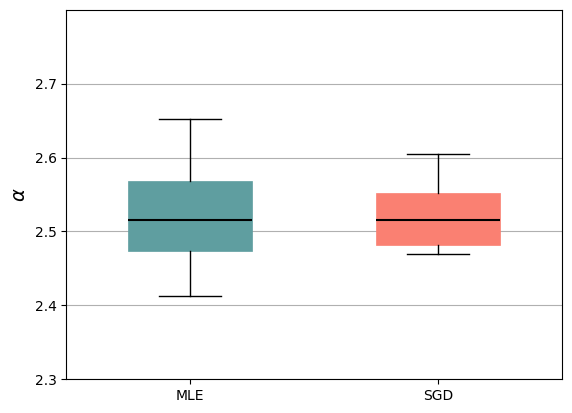

time: 906 ms (started: 2024-06-11 21:11:57 -03:00)


In [770]:
# print(np.asarray(statistics_mle)[:,0])
# print(np.asarray(statistics_sgd)[:,0])

D = (np.asarray(statistics_mle)[:,0], np.asarray(statistics_sgd)[:,0])

# plot
fig, ax = plt.subplots()
bp1 = ax.boxplot(np.asarray(statistics_mle)[:,0], positions=[2], widths=1.0, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "black", "linewidth": 1.5},
                boxprops={"facecolor": "cadetblue", "edgecolor": "cadetblue",
                          "linewidth": 0.5},
                whiskerprops={"color": "black", "linewidth": 1.},
                capprops={"color": "black", "linewidth": 1.})

bp2 = ax.boxplot(np.asarray(statistics_sgd)[:,0], positions=[4], widths=1.0, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "black", "linewidth": 1.5},
                boxprops={"facecolor": "salmon", "edgecolor": "salmon",
                          "linewidth": 0.5},
                whiskerprops={"color": "black", "linewidth": 1.},
                capprops={"color": "black", "linewidth": 1.})

# ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['MLE', 'Ours'], loc='upper right')

# ax.hlines(2.5, xmin=1, xmax=5, color='black', linestyles='--', linewidth=1)

ax.set_xticklabels(['MLE', 'SGD'])
ax.set_ylabel(r'$\alpha$', fontsize=14)

plt.grid(True)
ax.grid(axis='x')
ax.set(ylim=(2.3, 2.8), yticks=np.arange(2.3, 2.8, step=0.1), xlim=(1,5))

plt.savefig('boxplot.pdf')

plt.show()

In [711]:
mle_bias = []
sgd_bias = []
for i in range(n):
  print("\multirow{2}{*}{" + str(i+1) +"} ", end=' ')
  print("& MLE", end=' ')
  print("& %.3f" % statistics_mle[i][0], end=' ')
  bias = statistics_mle[i][0]-alpha
  mle_bias.append(bias)
  print("& %.3f" % bias, end=' ')

  for j in range(3, 7):
    print("& %.3f" % statistics_mle[i][j], end=' ')
  print("\\\ \cline{2-8}")

  ##########
  print("                    & SGD", end=' ')
  print("& %.3f" % statistics_sgd[i][0], end=' ')
  bias = statistics_sgd[i][0]-alpha
  sgd_bias.append(bias)
  print("& %.3f" % bias, end=' ')

  for j in range(3, 7):
    print("& %.3f" % statistics_sgd[i][j], end=' ')
  print("\\\ \hline \hline")


  # print(statistics_sgd[i])


\multirow{2}{*}{1}  & MLE & 2.413 & -0.087 & 98.760 & 0.420 & 105.842 & 0.315 \\ \cline{2-8}
                    & SGD & 2.355 & -0.145 & 99.800 & 0.442 & 127.814 & 0.325 \\ \hline \hline
\multirow{2}{*}{2}  & MLE & 2.581 & 0.081 & 96.840 & 0.414 & 56.773 & 0.340 \\ \cline{2-8}
                    & SGD & 2.546 & 0.046 & 98.080 & 0.358 & 38.920 & 0.345 \\ \hline \hline
\multirow{2}{*}{3}  & MLE & 2.509 & 0.009 & 99.040 & 0.392 & 73.468 & 0.211 \\ \cline{2-8}
                    & SGD & 2.525 & 0.025 & 99.160 & 0.392 & 72.130 & 0.209 \\ \hline \hline
\multirow{2}{*}{4}  & MLE & 2.461 & -0.039 & 97.320 & 0.162 & 7.738 & 0.280 \\ \cline{2-8}
                    & SGD & 2.475 & -0.025 & 97.320 & 0.136 & 5.184 & 0.278 \\ \hline \hline
\multirow{2}{*}{5}  & MLE & 2.530 & 0.030 & 99.400 & 0.344 & 61.376 & 0.346 \\ \cline{2-8}
                    & SGD & 2.500 & 0.000 & 99.680 & 0.324 & 44.363 & 0.350 \\ \hline \hline
\multirow{2}{*}{6}  & MLE & 2.470 & -0.030 & 99.680 & 0.314 & 62.090 & 0.290

In [712]:
def rmse(values, expected):
  rmse = np.sqrt(np.sum(np.power((np.asarray(values)-expected), 2)))
  return rmse

time: 0 ns (started: 2024-06-11 20:35:36 -03:00)


In [726]:
np.mean(statistics_mle, axis=0)

array([ 2.52350036,  1.        ,  0.99857176, 98.648     ,  0.3586    ,
       61.75511968,  0.31274941])

time: 16 ms (started: 2024-06-11 20:42:11 -03:00)


In [727]:
np.mean(statistics_sgd, axis=0)

array([ 2.51152115,  1.        ,  0.99856745, 99.088     ,  0.337     ,
       57.72361483,  0.31463399])

time: 0 ns (started: 2024-06-11 20:42:30 -03:00)


In [713]:
print(np.mean(mle_bias), np.mean(np.abs(mle_bias)), rmse(mle_bias, 2.3))
print(np.mean(sgd_bias), np.mean(np.abs(sgd_bias)), rmse(sgd_bias, 2.3))


0.023500359325642872 0.05834030765775822 7.202349801685021
0.01152114511952682 0.05143121736846874 7.239830732151004
time: 0 ns (started: 2024-06-11 20:35:37 -03:00)


# Estimating attribute distributions of empirical data

In [94]:
learning_rate = 0.01
max_iterations = 1500
momentum=0.5
n_seeds = 20

time: 0 ns (started: 2024-06-24 18:03:47 -03:00)


In [43]:
def evaluation_routine(data, set_name, plot=True, metric='KS_t'):
  print('Learning rate:'+str(learning_rate) + ' Momentum:' + str(momentum) + ' Max_iter:' + str(max_iterations) + ' N_seeds:' + str(n_seeds))

  metric_results = []
  
  if plot==True:
      rosechart(data[:, 0], filename=set_name +'rosechart.pdf')
      
  print('Estimating alpha and xmin with SGD')
  alpha_sgd, x_min_sgd = powerlaw_fit_SGD(data[:, 1], max_iterations, learning_rate, n_seeds, momentum, fix_x_min=None,
                                          metric = metric, multiprocessing=True, early_stopping=True, history=False)
  r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(data[:, 1], alpha_sgd, x_min_sgd, filename=set_name+'_sgd_'+metric+'.pdf', plot=plot)
  metric_results.append([alpha_sgd, x_min_sgd, ks_t, ks_d, A2, HD])
  if plot==True:
      print('alpha ' + str("%.2f" % alpha_sgd) + ' xmin: ' + str("%.2f" % x_min_sgd) + ' ks_t: ' +  str("%.2f" % ks_t) +
            ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
  print('------------------------------------------------------------------')
  print('')

  print('Estimating alpha and xmin with Deluca2013/Corral2019')
  alpha_d, xmin_d = powerlaw_fit_MLE(data[:, 1])
  r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(data[:, 1], alpha_d, xmin_d, filename=set_name+'_MLE_Deluca.pdf', plot=plot)
  metric_results.append([alpha_d, xmin_d, ks_t, ks_d, A2, HD])
  if plot==True:
      print('alpha ' + str("%.2f" % alpha_d) + ' xmin: ' + str("%.2f" % xmin_d) + ' ks_t: ' +  str("%.2f" % ks_t) +
            ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
  print('------------------------------------------------------------------')
  print('')

  print('Estimating alpha and xmin with Clauset2009/Alstot2013')
  fit = powerlaw.Fit(data[:, 1])
  alpha_mle = fit.power_law.alpha
  xmin_mle = fit.xmin
  r2, ks_t, ks_d, A2, HD = plot_powerlaw_fitting(data[:, 1], alpha_mle, xmin_mle, filename=set_name+'_MLE_Clauset.pdf', plot=plot)
  metric_results.append([alpha_mle, xmin_mle, ks_t, ks_d, A2, HD])
  if plot==True:
      print('alpha ' + str("%.2f" % alpha_mle) + ' xmin: ' + str("%.2f" % xmin_mle) + ' ks_t: ' +  str("%.2f" % ks_t) +
            ' ks_d: ' + str("%.2f" % ks_d) + ' A2: ' + str("%.2f" % A2) + ' HD: ' + str("%.2f" % HD) )
      plot_distributions_fitting(data[:, 1], xmin=fit.xmin, filename=set_name +'fitting.pdf', plot=True)
  print('------------------------------------------------------------------')
  print('')

  return metric_results


time: 0 ns (started: 2024-06-20 14:17:48 -03:00)


In [44]:
def print_empirical_results(results, direction):
  print("\multirow{3}{*}{" + direction +"} ", end=' ')
  for i in [2,1,0]:
    
    if i == 0:
      print(r"                      & SGD " + "", end=' ')
    if i == 1:
      print(r"                      & MLE²" + "", end=' ')
    if i == 2:
      print(r"& MLE¹" + "", end=' ')
    for j in [0,1,2,3,4,5]:
      print("& %.3f" % results[i][j], end=' ')
    if i !=0:
      print("\\\ \cline{2-8}")
  print("\\\ \hline \hline")

time: 0 ns (started: 2024-06-20 14:17:53 -03:00)


## Dataset 1

In [45]:
segm_group_angles = compute_line_angles(lines)

time: 0 ns (started: 2024-06-20 14:18:03 -03:00)


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


2.8726754484563033 6.837505428151423


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value floored: true value smaller than 0.001
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:620: UserWarning: p-value floored: true value smaller than 0.001
  score_expon_ad = anderson_ksamp([cf, fittedexpon.sf(X)], midrank=True)[0]


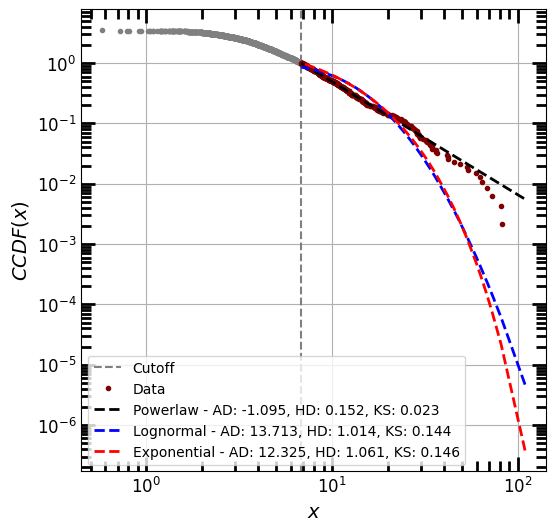

time: 688 ms (started: 2024-06-20 14:18:03 -03:00)


In [46]:
fit = powerlaw.Fit(segm_group_angles[:, 1])

print(fit.alpha, fit.xmin)

plot_distributions_fitting(segm_group_angles[:, 1], xmin=fit.xmin, filename=None, plot=True)

### N-S

Von mises kappa: 18.11788463349406
Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


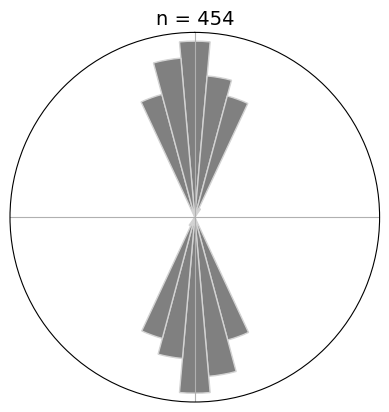

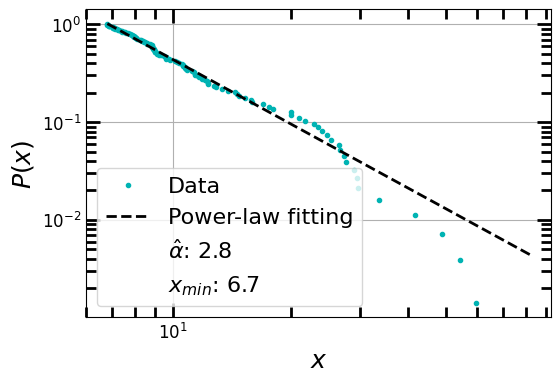

alpha 2.83 xmin: 6.74 ks_t: 99.60 ks_d: 0.30 A2: 9.45 HD: 0.30
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


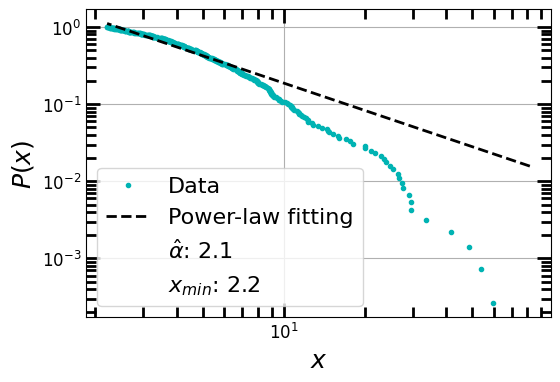

alpha 2.12 xmin: 2.21 ks_t: 1.68 ks_d: 0.66 A2: 150.52 HD: 0.30
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


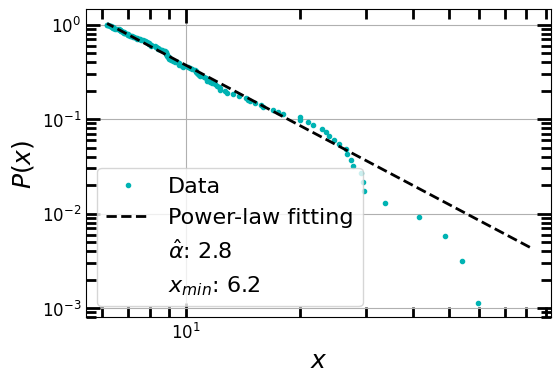

alpha 2.81 xmin: 6.15 ks_t: 99.32 ks_d: 0.30 A2: 11.32 HD: 0.29


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]


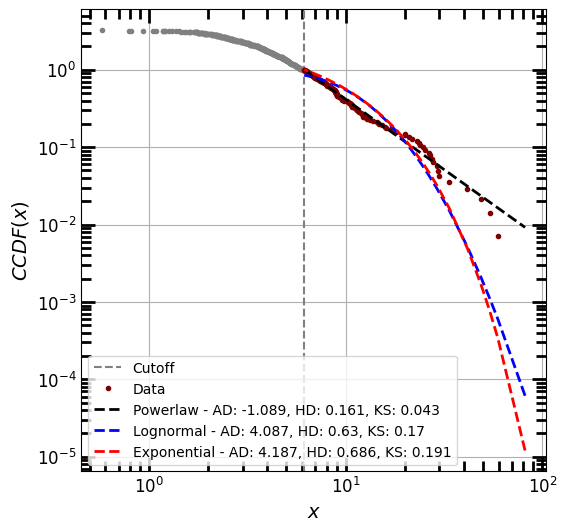

------------------------------------------------------------------

time: 5min 6s (started: 2024-06-20 14:18:03 -03:00)


In [47]:
# Set N-S (0-20 e 160 a 180) (?0)
set1_1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0),
         segm_group_angles[:, 0], None)

set1_1 = segm_group_angles[set1_1 != np.array(None)]

data = np.where(set1_1[:,0] > 155, set1_1[:,0] + 180, set1_1[:,0])
kappa, loc, scale =  scipy.stats.vonmises.fit(np.radians(data), fscale=1)
print('Von mises kappa: ' + str(kappa))

# print(set1[:,1])

results_NS = evaluation_routine(set1_1, 'Results_empirical_datasets/dataset1/_dataset1_N_S_')

### NE-SW

Von mises kappa: 26.301274222039076
Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


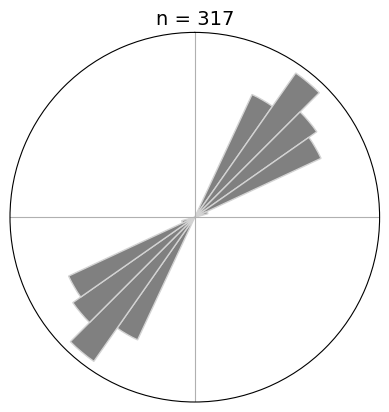

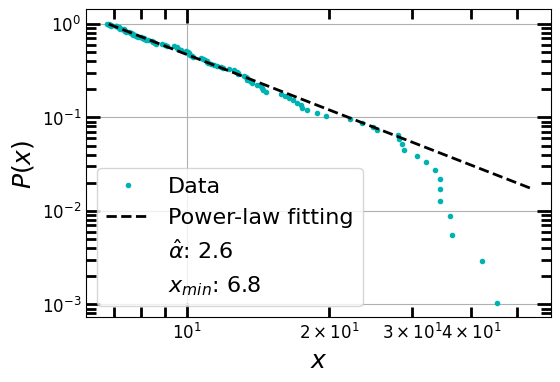

alpha 2.64 xmin: 6.78 ks_t: 99.64 ks_d: 0.36 A2: 10.25 HD: 0.25
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


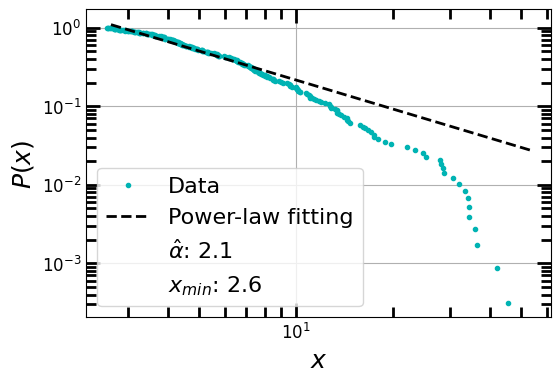

alpha 2.09 xmin: 2.59 ks_t: 11.32 ks_d: 0.45 A2: 48.80 HD: 0.31
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


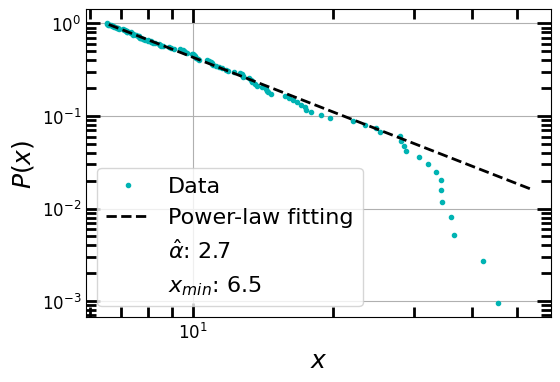

alpha 2.72 xmin: 6.51 ks_t: 99.64 ks_d: 0.36 A2: 10.88 HD: 0.27


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]


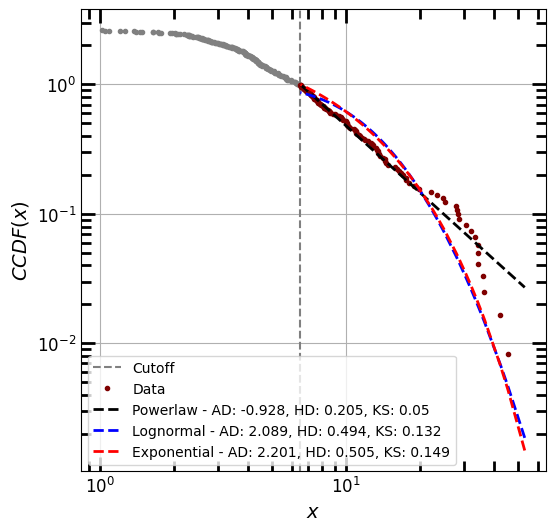

------------------------------------------------------------------

time: 5min 17s (started: 2024-06-20 14:23:10 -03:00)


In [48]:
# Set NE-SW (20 a 90)
set1_2 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1_2 = segm_group_angles[set1_2 != np.array(None)]

kappa, loc, scale =  scipy.stats.vonmises.fit(np.radians(set1_2[:,0]), fscale=1)
print('Von mises kappa: ' + str(kappa))

results_NE_SW = evaluation_routine(set1_2, 'Results_empirical_datasets/dataset1/_dataset1_NE_SW_')

### E-W

Von mises kappa: 16.924310465147375
Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


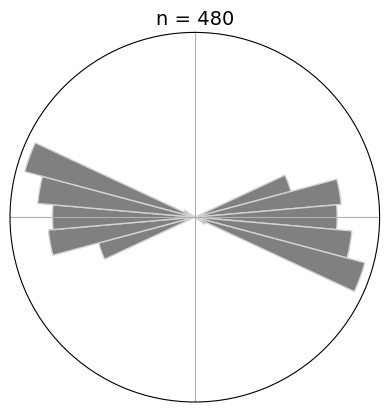

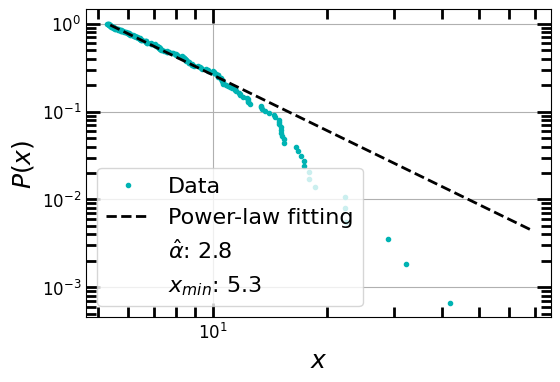

alpha 2.84 xmin: 5.28 ks_t: 99.56 ks_d: 0.47 A2: 54.38 HD: 0.30
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


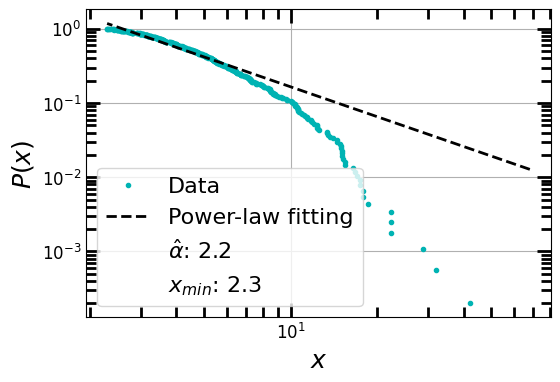

alpha 2.18 xmin: 2.26 ks_t: 0.00 ks_d: 0.75 A2: 236.11 HD: 0.37
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


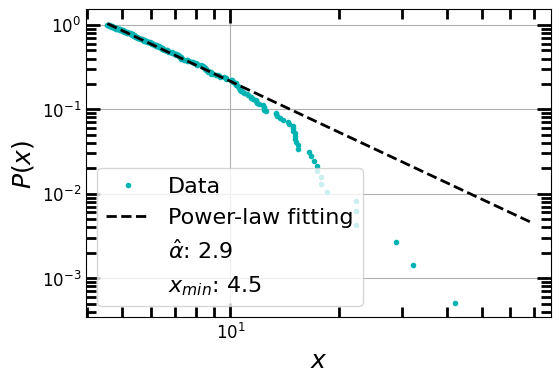

alpha 2.88 xmin: 4.54 ks_t: 96.76 ks_d: 0.41 A2: 55.08 HD: 0.24


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]


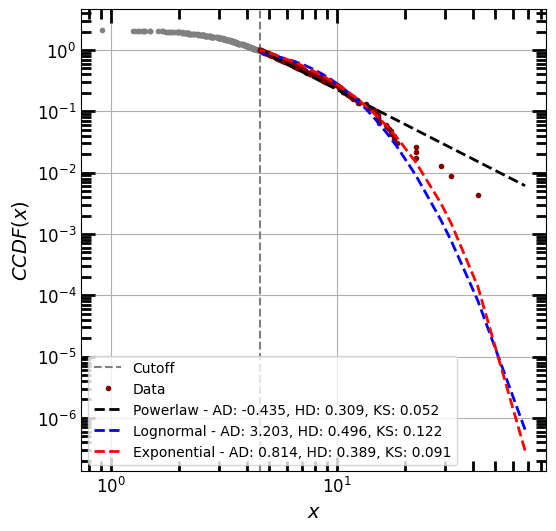

------------------------------------------------------------------

time: 6min 21s (started: 2024-06-20 14:28:28 -03:00)


In [49]:
set1_3 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1_3 = segm_group_angles[set1_3 != np.array(None)]

kappa, loc, scale =  scipy.stats.vonmises.fit(np.radians(set1_3[:,0]), fscale=1)
print('Von mises kappa: ' + str(kappa))

results_E_W = evaluation_routine(set1_3, 'Results_empirical_datasets/dataset1/_dataset1_E_W_')

In [50]:
### NE-SW

time: 0 ns (started: 2024-06-20 14:34:50 -03:00)


In [51]:
# # Set NE-SW (20 a 90)
# set1 = np.where((segm_group_angles[:, 0] > 20) & (segm_group_angles[:, 0] <= 90) & (segm_group_angles[:, 1] >0),
#          segm_group_angles[:, 0], None)

# set1 = segm_group_angles[set1 != np.array(None)]

# results_NE_SW = evaluation_routine(set1, 'NE_SW_')

time: 0 ns (started: 2024-06-20 14:34:50 -03:00)


In [52]:
### ESE-WNW

time: 0 ns (started: 2024-06-20 14:34:50 -03:00)


In [53]:
# Set ESE-WNW (90 a 130)
# set1 = np.where((segm_group_angles[:, 0] > 100) & (segm_group_angles[:, 0] <= 130) & (segm_group_angles[:, 1] >0),
#          segm_group_angles[:, 0], None)

# set1 = segm_group_angles[set1 != np.array(None)]

# results_ESE_WNN2 = evaluation_routine(set1, 'ESE_WNW2_')

time: 0 ns (started: 2024-06-20 14:34:50 -03:00)


In [54]:
# # Set ESE-WNW (90 a 130)
# set1 = np.where((segm_group_angles[:, 0] > 90) & (segm_group_angles[:, 0] <= 130) & (segm_group_angles[:, 1] >0),
#          segm_group_angles[:, 0], None)

# set1 = segm_group_angles[set1 != np.array(None)]

# results_ESE_WNN = evaluation_routine(set1, 'ESE_WNW_')


time: 15 ms (started: 2024-06-20 14:34:50 -03:00)


### NW-SE

Von mises kappa: 25.793638453656737
Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


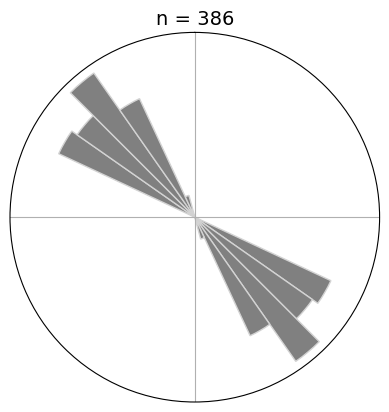

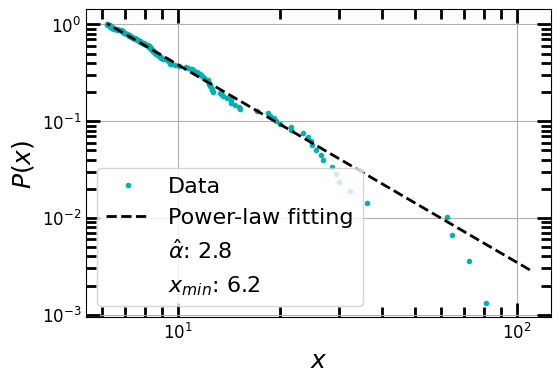

alpha 2.81 xmin: 6.17 ks_t: 99.48 ks_d: 0.21 A2: 2.08 HD: 0.31
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


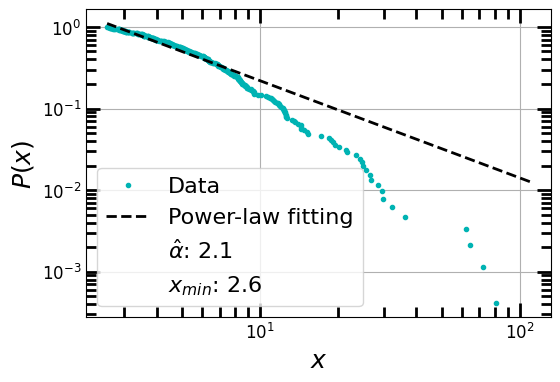

alpha 2.14 xmin: 2.58 ks_t: 11.40 ks_d: 0.61 A2: 126.78 HD: 0.27
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


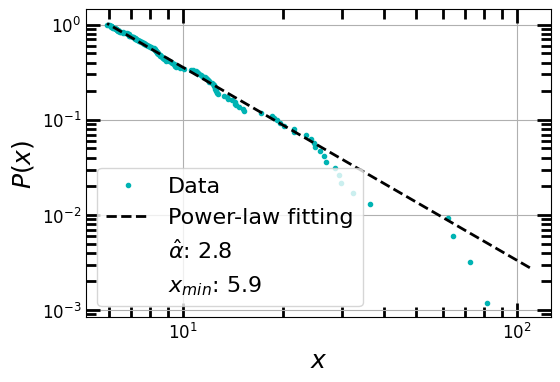

alpha 2.77 xmin: 5.92 ks_t: 99.28 ks_d: 0.21 A2: 3.05 HD: 0.31


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]


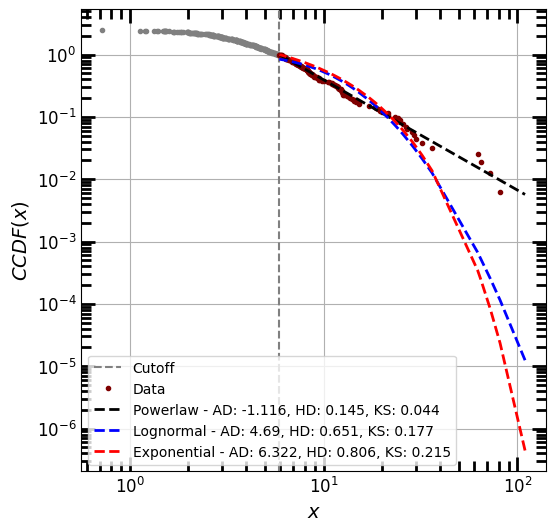

------------------------------------------------------------------

time: 6min 8s (started: 2024-06-20 14:34:50 -03:00)


In [55]:
# Set SE-NO (130 a 160)
set1_4 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1_4 = segm_group_angles[set1_4 != np.array(None)]

kappa, loc, scale =  scipy.stats.vonmises.fit(np.radians(set1_4[:,0]), fscale=1)
print('Von mises kappa: ' + str(kappa))

results_NW_SE = evaluation_routine(set1_4, 'Results_empirical_datasets/dataset1/_dataset1_NW_SE_')

In [56]:
### SE-NO

time: 0 ns (started: 2024-06-20 14:40:59 -03:00)


In [57]:
# # Set SE-NO (130 a 160)
# set1 = np.where((segm_group_angles[:, 0] > 130) & (segm_group_angles[:, 0] <= 160) & (segm_group_angles[:, 1] >0),
#          segm_group_angles[:, 0], None)

# set1 = segm_group_angles[set1 != np.array(None)]

# results_SE_NO = evaluation_routine(set1, 'SE_NO_')


time: 0 ns (started: 2024-06-20 14:40:59 -03:00)


In [58]:
print_empirical_results(results_NS, 'N-S')

\multirow{3}{*}{N-S}  & MLE¹ & 2.813 & 6.154 & 99.320 & 0.300 & 11.320 & 0.290 \\ \cline{2-8}
                      & MLE² & 2.120 & 2.209 & 1.680 & 0.656 & 150.522 & 0.303 \\ \cline{2-8}
                      & SGD  & 2.830 & 6.744 & 99.600 & 0.300 & 9.447 & 0.303 \\ \hline \hline
time: 16 ms (started: 2024-06-20 14:40:59 -03:00)


In [59]:
print_empirical_results(results_NS, 'N-S')
print_empirical_results(results_NE_SW, 'NE-SW')
print_empirical_results(results_E_W, 'E-W')
print_empirical_results(results_NW_SE, 'NW-SE')

\multirow{3}{*}{N-S}  & MLE¹ & 2.813 & 6.154 & 99.320 & 0.300 & 11.320 & 0.290 \\ \cline{2-8}
                      & MLE² & 2.120 & 2.209 & 1.680 & 0.656 & 150.522 & 0.303 \\ \cline{2-8}
                      & SGD  & 2.830 & 6.744 & 99.600 & 0.300 & 9.447 & 0.303 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.718 & 6.514 & 99.640 & 0.358 & 10.881 & 0.275 \\ \cline{2-8}
                      & MLE² & 2.091 & 2.586 & 11.320 & 0.445 & 48.803 & 0.305 \\ \cline{2-8}
                      & SGD  & 2.638 & 6.779 & 99.640 & 0.360 & 10.249 & 0.245 \\ \hline \hline
\multirow{3}{*}{E-W}  & MLE¹ & 2.882 & 4.538 & 96.760 & 0.410 & 55.083 & 0.245 \\ \cline{2-8}
                      & MLE² & 2.184 & 2.264 & 0.000 & 0.755 & 236.109 & 0.371 \\ \cline{2-8}
                      & SGD  & 2.840 & 5.278 & 99.560 & 0.473 & 54.383 & 0.297 \\ \hline \hline
\multirow{3}{*}{NW-SE}  & MLE¹ & 2.771 & 5.915 & 99.280 & 0.210 & 3.054 & 0.313 \\ \cline{2-8}
                      & MLE² & 2.143 & 2.576 & 11.40

## Dataset 2

In [60]:
angles2 = compute_line_angles(segments_in_circle1)

time: 0 ns (started: 2024-06-20 14:42:31 -03:00)


### N-S

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


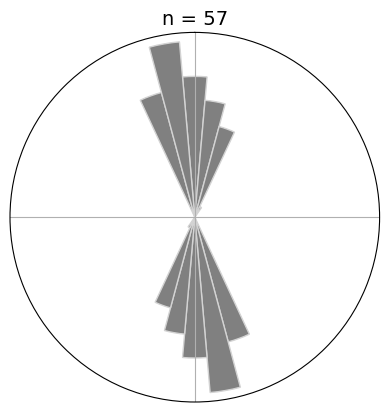

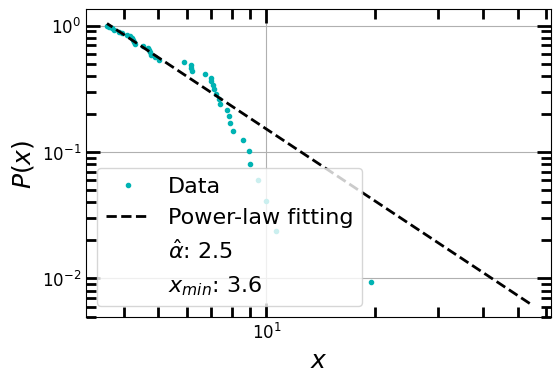

alpha 2.53 xmin: 3.56 ks_t: 97.44 ks_d: 0.47 A2: 4.28 HD: 0.47
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


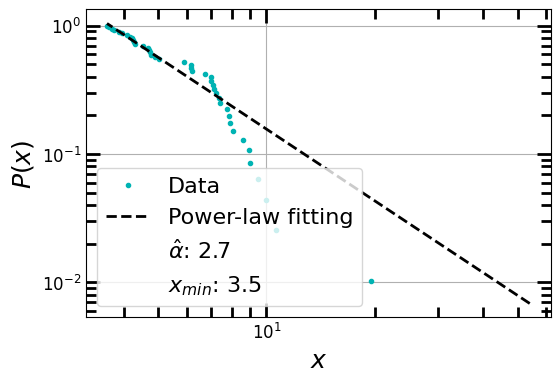

alpha 2.74 xmin: 3.50 ks_t: 94.16 ks_d: 0.42 A2: 2.65 HD: 0.46
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


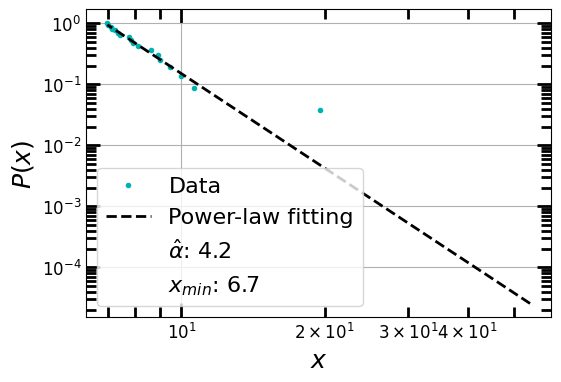

alpha 4.20 xmin: 6.74 ks_t: 99.44 ks_d: 0.68 A2: 5.49 HD: 0.62


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]


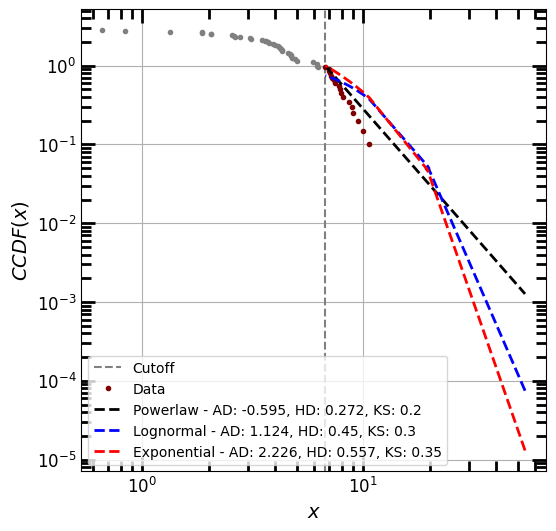

------------------------------------------------------------------

time: 5min 57s (started: 2024-06-20 14:42:31 -03:00)


In [61]:
#
set2_1 = np.where((angles2[:, 0] <= 25) | (angles2[:, 0] > 155) & (angles2[:, 1] > 0),
         angles2[:, 0], None)

set2_1 = angles2[set2_1 != np.array(None)]
# rosechart_plot = rosechart(set1[:, 0])

results_2_N_S = evaluation_routine(set2_1, 'Results_empirical_datasets/dataset2/_dataset2_N_S_', plot=True)

### NE-SW

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]
c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


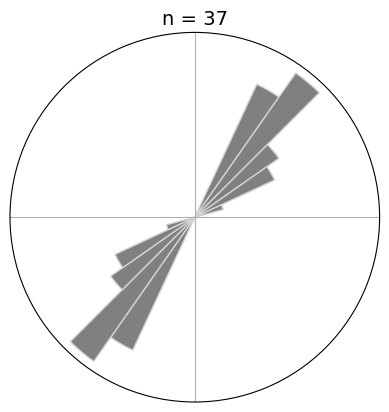

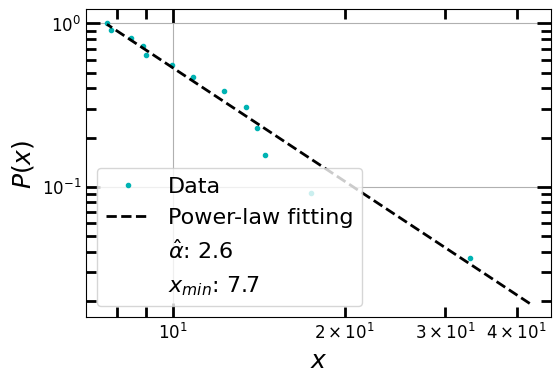

alpha 2.57 xmin: 7.66 ks_t: 99.84 ks_d: 0.36 A2: -0.22 HD: 0.49
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


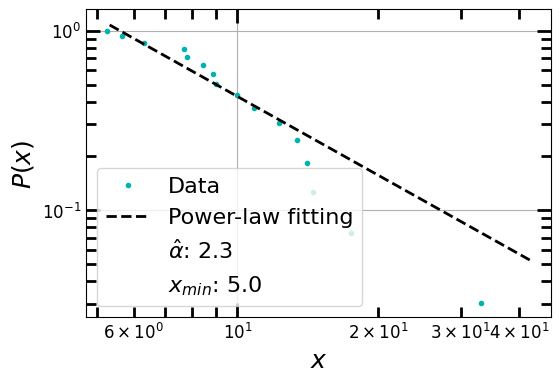

alpha 2.30 xmin: 4.96 ks_t: 92.72 ks_d: 0.29 A2: 0.27 HD: 0.31
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]
c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


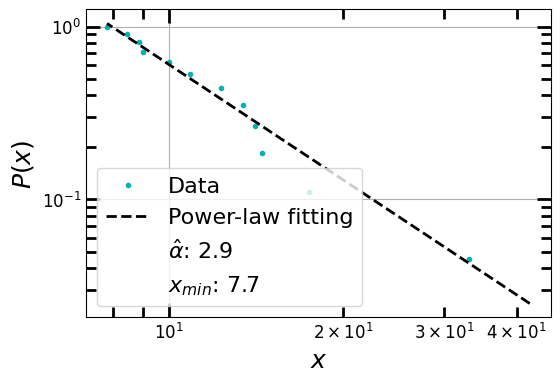

alpha 2.92 xmin: 7.68 ks_t: 99.60 ks_d: 0.31 A2: -0.43 HD: 0.45


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:620: UserWarning: p-value capped: true value larger than 0.25
  score_expon_ad = anderson_ksamp([cf, fittedexpon.sf(X)], midrank=True)[0]


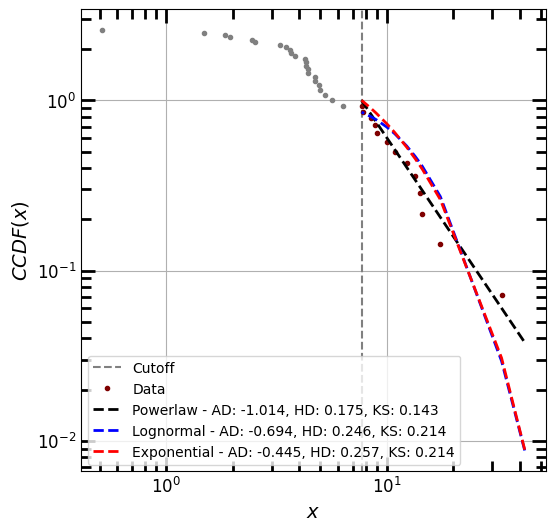

------------------------------------------------------------------

time: 5min 21s (started: 2024-06-20 14:48:28 -03:00)


In [62]:
# Set NE-SW (20 a 90)
set2_2 = np.where((angles2[:, 0] > 25) & (angles2[:, 0] <= 65) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set2_2 = angles2[set2_2 != np.array(None)]

results_2_NE_SW = evaluation_routine(set2_2, 'Results_empirical_datasets/dataset2/_dataset2_NE_SW_')

### E-W

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


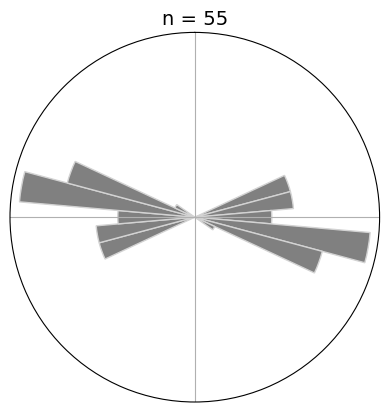

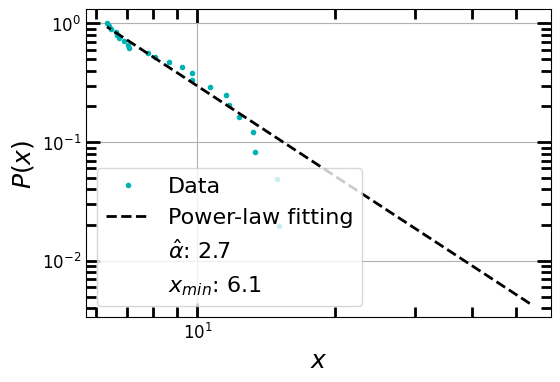

alpha 2.72 xmin: 6.09 ks_t: 99.40 ks_d: 0.54 A2: 2.29 HD: 0.52
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


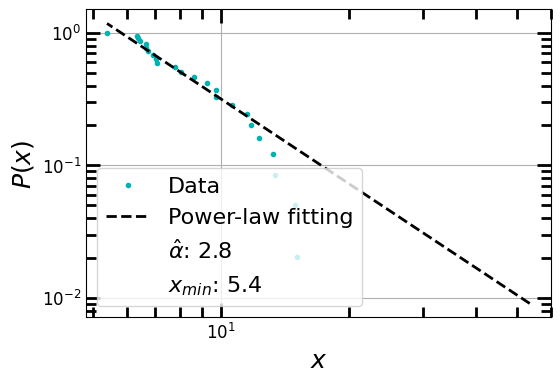

alpha 2.83 xmin: 5.37 ks_t: 94.76 ks_d: 0.44 A2: 0.95 HD: 0.46
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


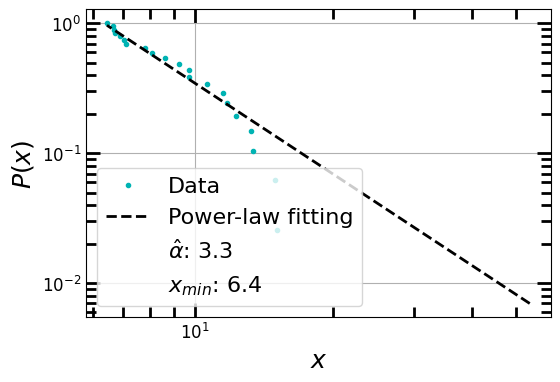

alpha 3.29 xmin: 6.39 ks_t: 99.48 ks_d: 0.55 A2: 2.17 HD: 0.46


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:620: UserWarning: p-value capped: true value larger than 0.25
  score_expon_ad = anderson_ksamp([cf, fittedexpon.sf(X)], midrank=True)[0]


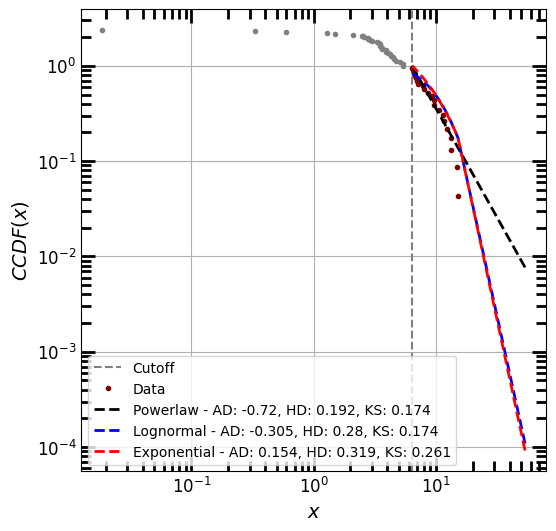

------------------------------------------------------------------

time: 4min 35s (started: 2024-06-20 14:53:50 -03:00)


In [63]:
set2_3 = np.where((angles2[:, 0] > 65) & (angles2[:, 0] <= 115) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set2_3 = angles2[set2_3 != np.array(None)]

results_2_E_W = evaluation_routine(set2_3, 'Results_empirical_datasets/dataset2/_dataset2_E_W_')

### NW-SE

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


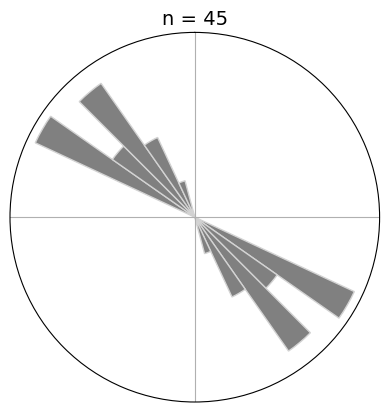

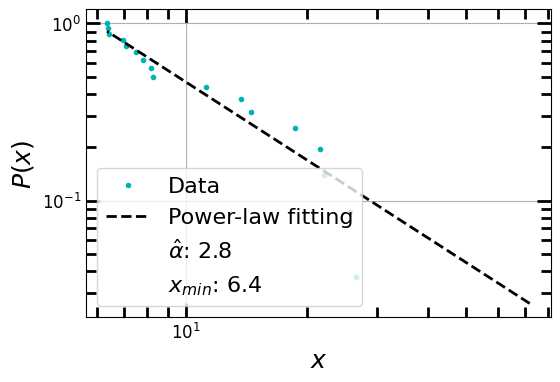

alpha 2.83 xmin: 6.36 ks_t: 99.96 ks_d: 0.56 A2: 1.92 HD: 0.51
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


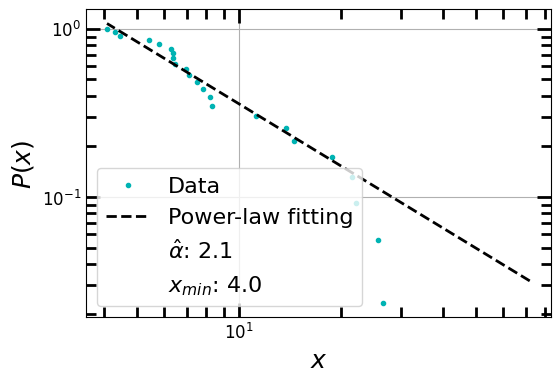

alpha 2.14 xmin: 3.98 ks_t: 96.64 ks_d: 0.58 A2: 4.16 HD: 0.44
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


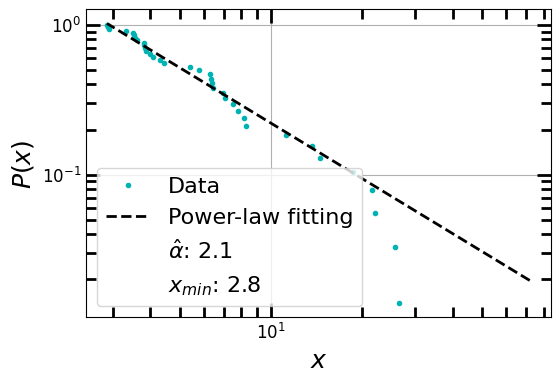

alpha 2.14 xmin: 2.78 ks_t: 97.92 ks_d: 0.62 A2: 11.61 HD: 0.48


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]


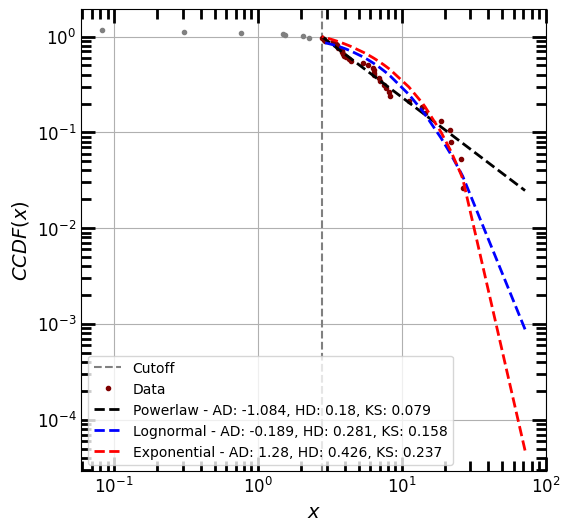

------------------------------------------------------------------

time: 3min 49s (started: 2024-06-20 14:58:26 -03:00)


In [64]:
# 
set2_4 = np.where((angles2[:, 0] > 115) & (angles2[:, 0] <= 155) & (angles2[:, 1] >0),
         angles2[:, 0], None)

set2_4 = angles2[set2_4 != np.array(None)]

results_2_NW_SE = evaluation_routine(set2_4, 'Results_empirical_datasets/dataset2/_dataset2_NW_SE_')

In [65]:
print_empirical_results(results_2_N_S, 'N-S')
print_empirical_results(results_2_NE_SW, 'NE-SW')
print_empirical_results(results_2_E_W, 'E-W')
print_empirical_results(results_2_NW_SE, 'NW-SE')

\multirow{3}{*}{N-S}  & MLE¹ & 4.202 & 6.736 & 99.440 & 0.684 & 5.491 & 0.619 \\ \cline{2-8}
                      & MLE² & 2.738 & 3.496 & 94.160 & 0.419 & 2.650 & 0.457 \\ \cline{2-8}
                      & SGD  & 2.528 & 3.558 & 97.440 & 0.465 & 4.284 & 0.473 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.923 & 7.678 & 99.600 & 0.308 & -0.432 & 0.447 \\ \cline{2-8}
                      & MLE² & 2.302 & 4.963 & 92.720 & 0.294 & 0.266 & 0.310 \\ \cline{2-8}
                      & SGD  & 2.571 & 7.663 & 99.840 & 0.357 & -0.218 & 0.493 \\ \hline \hline
\multirow{3}{*}{E-W}  & MLE¹ & 3.291 & 6.386 & 99.480 & 0.545 & 2.168 & 0.463 \\ \cline{2-8}
                      & MLE² & 2.832 & 5.371 & 94.760 & 0.440 & 0.951 & 0.456 \\ \cline{2-8}
                      & SGD  & 2.718 & 6.089 & 99.400 & 0.542 & 2.290 & 0.519 \\ \hline \hline
\multirow{3}{*}{NW-SE}  & MLE¹ & 2.138 & 2.777 & 97.920 & 0.622 & 11.607 & 0.477 \\ \cline{2-8}
                      & MLE² & 2.143 & 3.975 & 96.640 & 0

## Dataset 3

In [66]:
angles3 = compute_line_angles(segments_in_circle2)

time: 0 ns (started: 2024-06-20 15:02:15 -03:00)


### N-S

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


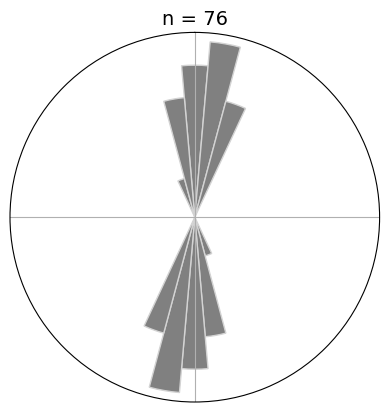

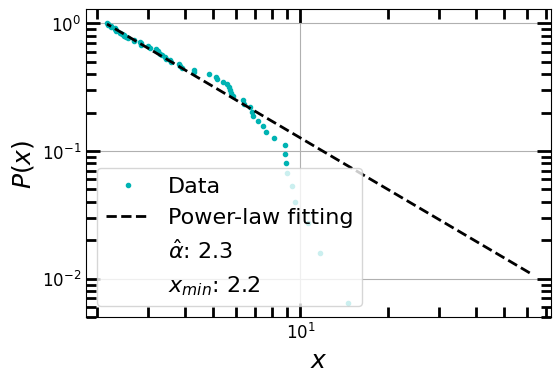

alpha 2.30 xmin: 2.16 ks_t: 99.28 ks_d: 0.66 A2: 20.05 HD: 0.43
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


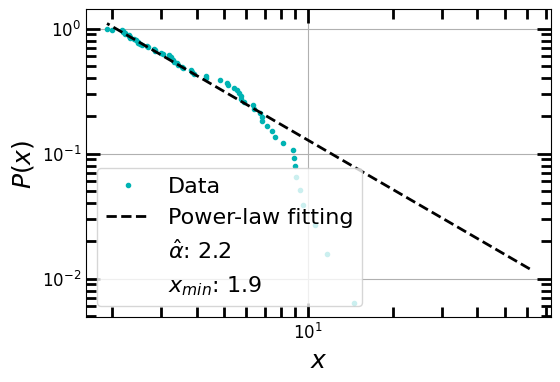

alpha 2.24 xmin: 1.91 ks_t: 95.24 ks_d: 0.70 A2: 29.03 HD: 0.41
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


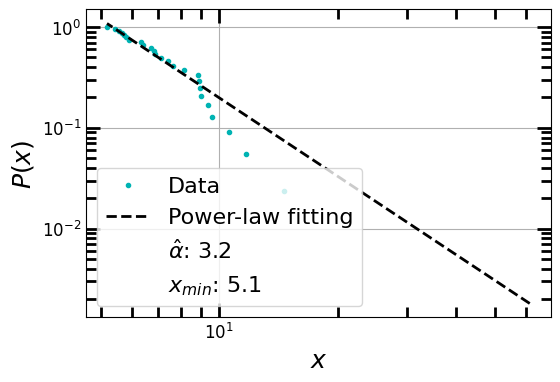

alpha 3.25 xmin: 5.12 ks_t: 98.88 ks_d: 0.65 A2: 6.19 HD: 0.52


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]


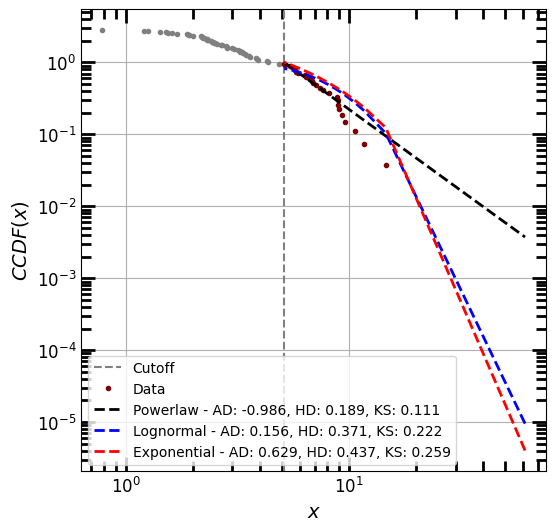

------------------------------------------------------------------

time: 5min 26s (started: 2024-06-20 15:02:15 -03:00)


In [67]:
set3_1 = np.where((angles3[:, 0] <= 25) | (angles3[:, 0] > 155) & (angles3[:, 1] > 0),
         angles3[:, 0], None)

set3_1 = angles3[set3_1 != np.array(None)]
# rosechart_plot = rosechart(set1[:, 0])

results_3_N_S = evaluation_routine(set3_1, 'Results_empirical_datasets/dataset3/_dataset3_N_S_', metric='KS_t0')

### NE-SW

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


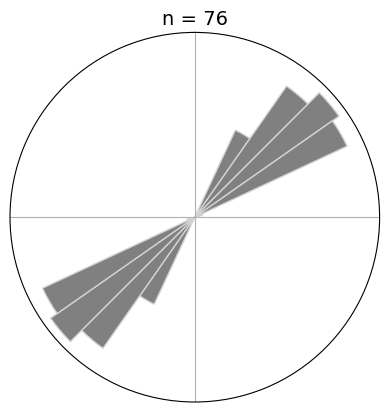

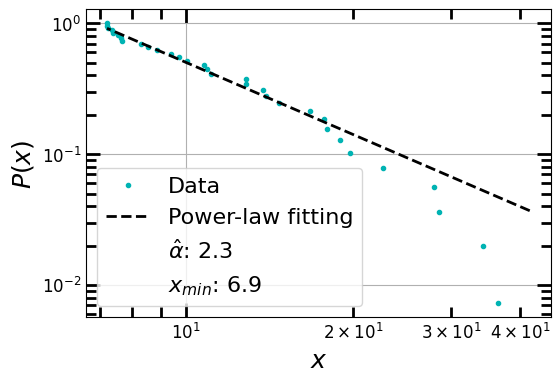

alpha 2.27 xmin: 6.94 ks_t: 99.96 ks_d: 0.39 A2: 3.69 HD: 0.42
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


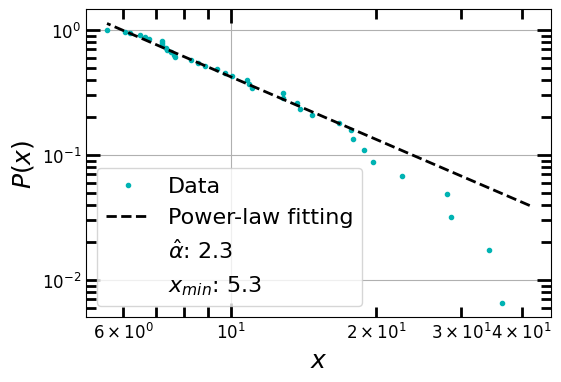

alpha 2.31 xmin: 5.31 ks_t: 92.16 ks_d: 0.31 A2: 1.38 HD: 0.22
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


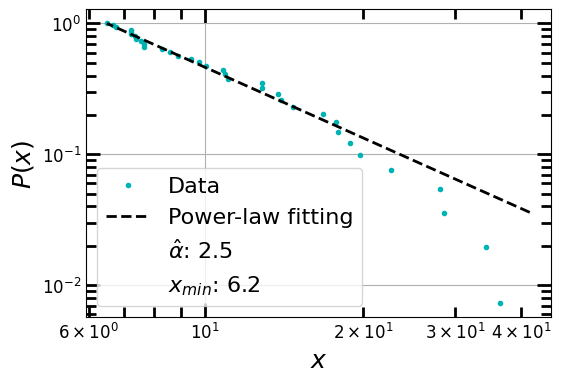

alpha 2.50 xmin: 6.19 ks_t: 99.12 ks_d: 0.22 A2: 0.22 HD: 0.36


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:620: UserWarning: p-value capped: true value larger than 0.25
  score_expon_ad = anderson_ksamp([cf, fittedexpon.sf(X)], midrank=True)[0]


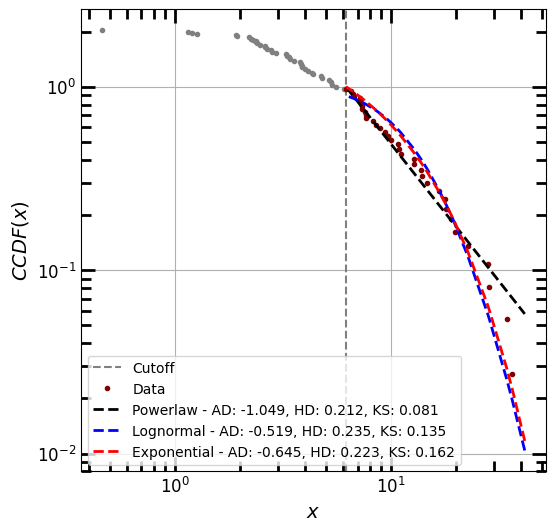

------------------------------------------------------------------

time: 3min 11s (started: 2024-06-20 15:07:42 -03:00)


In [68]:
set3_2 = np.where((angles3[:, 0] > 25) & (angles3[:, 0] <= 65) & (angles3[:, 1] >0),
         angles3[:, 0], None)

set3_2 = angles3[set3_2 != np.array(None)]

results_3_NE_SW = evaluation_routine(set3_2, 'Results_empirical_datasets/dataset3/_dataset3_NE_SW_')

### E-W

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


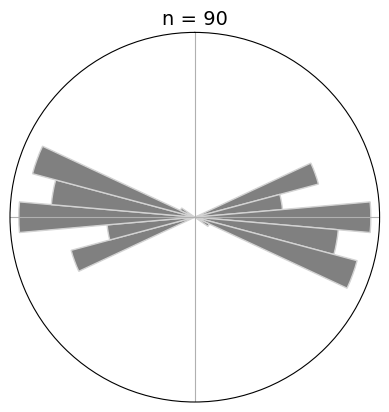

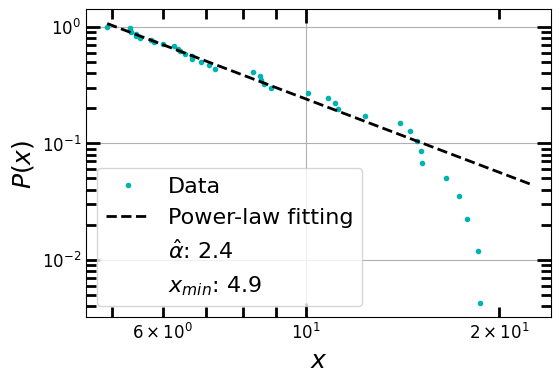

alpha 2.35 xmin: 4.86 ks_t: 99.56 ks_d: 0.35 A2: 2.89 HD: 0.30
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


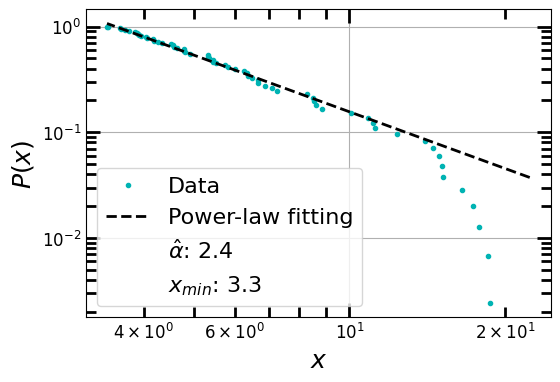

alpha 2.45 xmin: 3.32 ks_t: 97.08 ks_d: 0.27 A2: 2.71 HD: 0.23
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


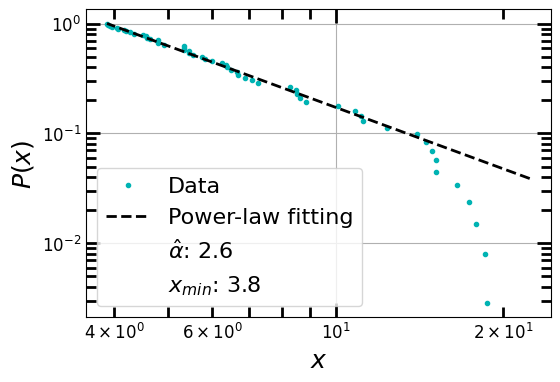

alpha 2.62 xmin: 3.85 ks_t: 98.76 ks_d: 0.25 A2: 2.11 HD: 0.30


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:620: UserWarning: p-value capped: true value larger than 0.25
  score_expon_ad = anderson_ksamp([cf, fittedexpon.sf(X)], midrank=True)[0]


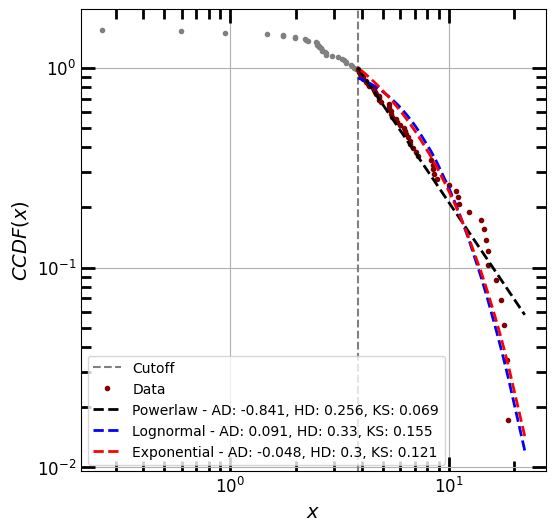

------------------------------------------------------------------

time: 5min 1s (started: 2024-06-20 15:10:53 -03:00)


In [69]:
set3_3 = np.where((angles3[:, 0] > 65) & (angles3[:, 0] <= 115) & (angles3[:, 1] >0),
         angles3[:, 0], None)

set3_3 = angles3[set3_3 != np.array(None)]

results_3_E_W= evaluation_routine(set3_3, 'Results_empirical_datasets/dataset3/_dataset3_E-W_')

### NW-SE

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


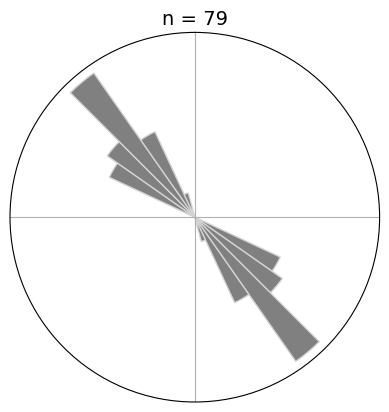

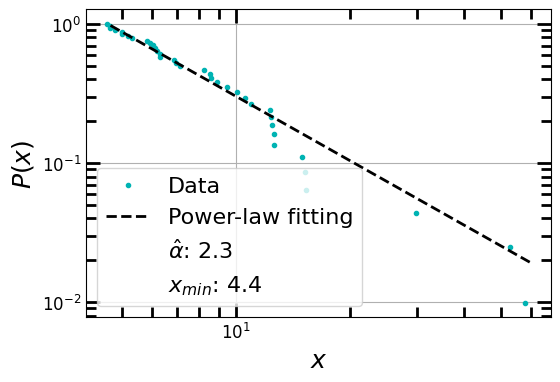

alpha 2.29 xmin: 4.43 ks_t: 99.24 ks_d: 0.37 A2: 1.57 HD: 0.39
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


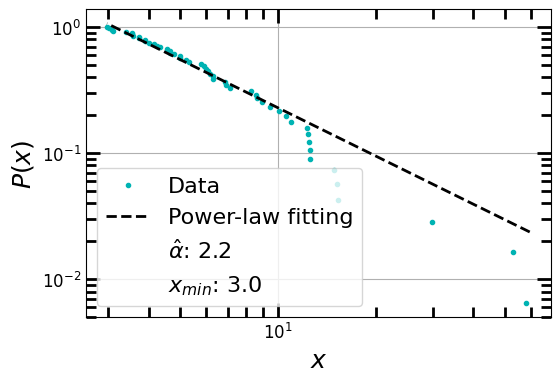

alpha 2.16 xmin: 2.96 ks_t: 98.48 ks_d: 0.30 A2: 1.00 HD: 0.36
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit


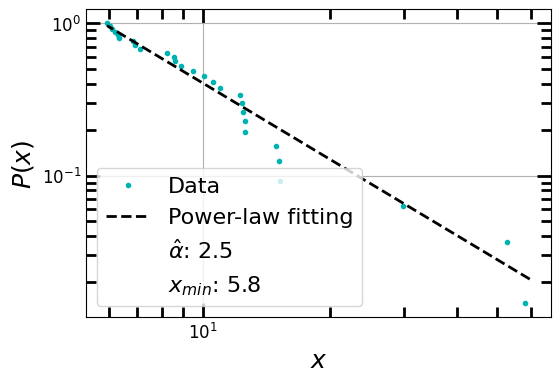

alpha 2.51 xmin: 5.81 ks_t: 99.40 ks_d: 0.48 A2: 3.86 HD: 0.42


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:616: UserWarning: p-value capped: true value larger than 0.25
  score_powerlaw_ad = anderson_ksamp([cf, np.flip(fit.power_law.ccdf())], midrank=True)[0]
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:618: UserWarning: p-value capped: true value larger than 0.25
  score_log_ad = anderson_ksamp([cf, fittedlog.sf(X)], midrank=True)[0]


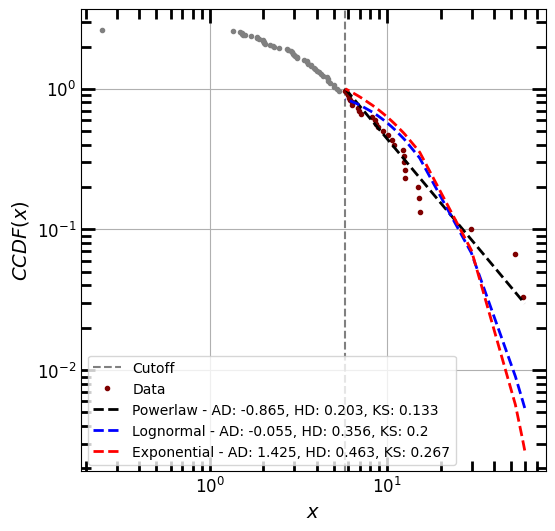

------------------------------------------------------------------

time: 4min 43s (started: 2024-06-20 15:15:55 -03:00)


In [70]:
set3_4 = np.where((angles3[:, 0] > 115) & (angles3[:, 0] <= 155) & (angles3[:, 1] >0),
         angles3[:, 0], None)

set3_4 = angles3[set3_4 != np.array(None)]

results_3_NW_SE = evaluation_routine(set3_4, 'Results_empirical_datasets/dataset3/_dataset3_NW_SE_')

In [71]:
print_empirical_results(results_3_N_S, 'N-S')
print_empirical_results(results_3_NE_SW, 'NE-SW')
print_empirical_results(results_3_E_W, 'E-W')
print_empirical_results(results_3_NW_SE, 'NW-SE')

\multirow{3}{*}{N-S}  & MLE¹ & 3.250 & 5.123 & 98.880 & 0.654 & 6.190 & 0.517 \\ \cline{2-8}
                      & MLE² & 2.238 & 1.915 & 95.240 & 0.697 & 29.035 & 0.406 \\ \cline{2-8}
                      & SGD  & 2.299 & 2.163 & 99.280 & 0.656 & 20.050 & 0.434 \\ \hline \hline
\multirow{3}{*}{NE-SW}  & MLE¹ & 2.496 & 6.189 & 99.120 & 0.222 & 0.222 & 0.356 \\ \cline{2-8}
                      & MLE² & 2.309 & 5.312 & 92.160 & 0.308 & 1.382 & 0.224 \\ \cline{2-8}
                      & SGD  & 2.270 & 6.937 & 99.960 & 0.394 & 3.689 & 0.416 \\ \hline \hline
\multirow{3}{*}{E-W}  & MLE¹ & 2.619 & 3.848 & 98.760 & 0.246 & 2.112 & 0.299 \\ \cline{2-8}
                      & MLE² & 2.448 & 3.316 & 97.080 & 0.266 & 2.705 & 0.231 \\ \cline{2-8}
                      & SGD  & 2.352 & 4.865 & 99.560 & 0.350 & 2.887 & 0.304 \\ \hline \hline
\multirow{3}{*}{NW-SE}  & MLE¹ & 2.510 & 5.809 & 99.400 & 0.483 & 3.858 & 0.416 \\ \cline{2-8}
                      & MLE² & 2.163 & 2.961 & 98.480 & 0.

# Stochastic DFN

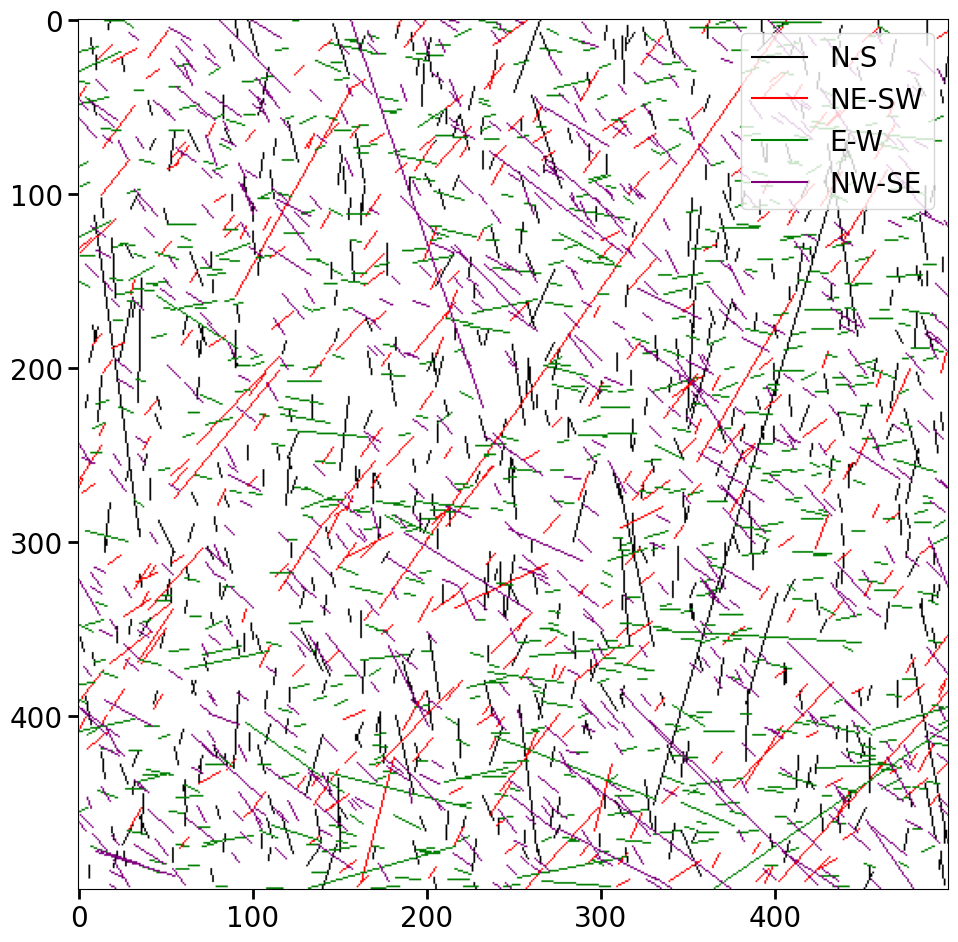

time: 39.7 s (started: 2024-06-20 15:22:13 -03:00)


In [72]:
sizeX = 500
sizeY = 500
N = 1000

new_set1 = generate_fractures(theta=0, kappa=18.12, alpha1=results_NS[0][0], xmin=results_NS[0][1], max_p21=0.032, dimensions=(sizeX, sizeY),  monte_carlo_iterations=N)
new_set2 = generate_fractures(theta=40, kappa=26.27, alpha1=results_NE_SW[0][0], xmin=results_NE_SW[0][1], max_p21=0.022, dimensions=(sizeX, sizeY),  monte_carlo_iterations=N)
new_set3 = generate_fractures(theta=90, kappa=16.93, alpha1=results_E_W[0][0], xmin=results_E_W[0][1], max_p21=0.032, dimensions=(sizeX, sizeY), monte_carlo_iterations=N)
new_set4 = generate_fractures(theta=135, kappa=25.78, alpha1=results_NW_SE[0][0], xmin=results_NW_SE[0][1], max_p21=0.034, dimensions=(sizeX, sizeY), monte_carlo_iterations=N)

# new_set1 = generate_fractures(theta=0, kappa=18.12, alpha1=2.86, xmin=6.3, max_p21=0.032, dimensions=(sizeX, sizeY),  monte_carlo_iterations=N)
# new_set2 = generate_fractures(theta=40, kappa=26.27, alpha1=2.61, xmin=6.5, max_p21=0.022, dimensions=(sizeX, sizeY),  monte_carlo_iterations=N)
# new_set3 = generate_fractures(theta=90, kappa=16.93, alpha1=2.77, xmin=4.6, max_p21=0.032, dimensions=(sizeX, sizeY), monte_carlo_iterations=N)
# new_set4 = generate_fractures(theta=135, kappa=25.78, alpha1=2.86, xmin=7.8, max_p21=0.034, dimensions=(sizeX, sizeY), monte_carlo_iterations=N)


new_lines = np.concatenate((new_set1, new_set2, new_set3, new_set4), axis = 0)

image = np.full((int(sizeY), int(sizeX), 3), 255, dtype=np.uint8)
# image = draw_lines(image, new_lines, 0, 0, color=(0,0,0))

image = draw_lines(image, new_set1, 0, 0, color=(0,0,0)) # BGR
image = draw_lines(image, new_set2, 0, 0, color=(0,0,255))
image = draw_lines(image, new_set3, 0, 0, color=(0,128,0))
image = draw_lines(image, new_set4, 0, 0, color=(128,0,128))

# plt.figure(1, (20,20))

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot([], [], '-', label=r'N-S', color=(0,0,0)) #RGB
ax.plot([], [], '-', label=r'NE-SW', color=(1,0,0))
ax.plot([], [], '-', label=r'E-W', color=(0,0.5,0))
ax.plot([], [], '-', label=r'NW-SE', color=(0.5,0,0.5))
ax.legend(loc='upper right', fontsize=20)
ax.xaxis.set_tick_params(which='major', size=7, width=2, direction='out', labelsize=20)
ax.yaxis.set_tick_params(which='major', size=7, width=2, direction='out', labelsize=20)

plt.tight_layout()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('dfn_stochastic.pdf')

In [5]:
np.save('synthetic_dfn.npy', new_lines)

time: 0 ns (started: 2024-05-24 18:47:03 -03:00)


In [107]:
np.mean(p21_mean[2])

0.03253828476296291

time: 0 ns (started: 2024-06-24 18:59:38 -03:00)


## REV for the stochastic DFN

In [110]:
n_circle_centers = 100
circle_centers = []
for i in range(n_circle_centers):
    circle_centers.append((np.random.uniform()*500, np.random.random()*500))

time: 0 ns (started: 2024-06-24 19:02:26 -03:00)


0.034974000854905554


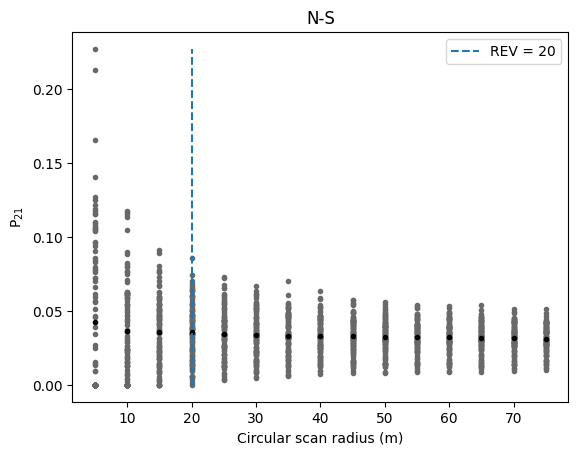

0.012588444785571072


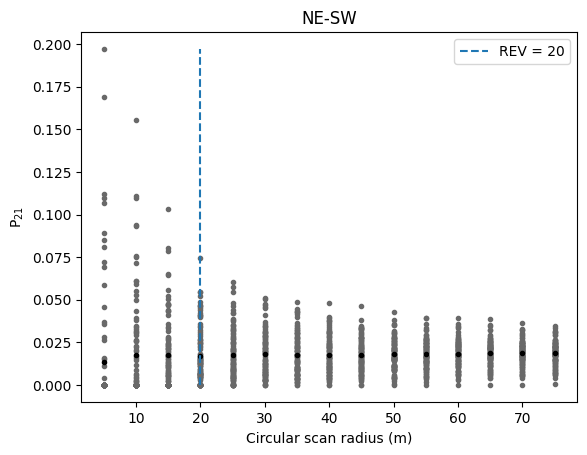

0.02384366756840344


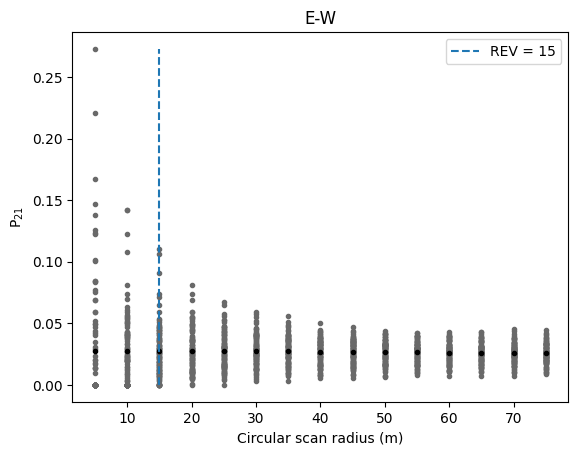

0.02443239036680906


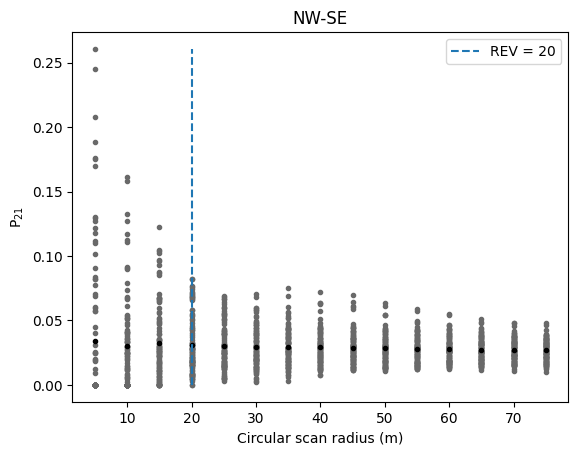

time: 39.2 s (started: 2024-06-24 19:21:47 -03:00)


In [112]:
sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']

min_radius = 5
max_radius = 80
step = 5
radius_list_size = np.shape(list(range(min_radius, max_radius, step)))[0]
significance_level = 0.05


for set in sets:

    p21_mean = []
    for radius in range(min_radius, max_radius, step):
        p21_list = []
        for circle_center in circle_centers:
            segments_in_circle = circular_scanline(new_lines, circle_center, radius)
            segm_group_angles = compute_line_angles(segments_in_circle)


            if set == 'N-S':
                set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
            if set == 'NE-SW':
                set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
            if set == 'E-W':
                set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
            if set == 'NW-SE':
                set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)


            set1 = segm_group_angles[set1 != np.array(None)]

            sum_distances = np.sum(set1[:,1])
            circle_area = np.pi*np.power(radius,2)
            p21 = sum_distances/circle_area
            p20 = np.shape(set1[:,1])[0]/circle_area
            p21_list.append(p21)
        # p21_mean.append(np.mean(p21_list))
        p21_mean.append(p21_list)

    p21_matrix = np.reshape(p21_mean, (radius_list_size, n_circle_centers))

    REV = -1
    for i in range(radius_list_size):
        stats1 = scipy.stats.ttest_ind([i for i in p21_matrix[i,:].tolist() if i != 0], p21_matrix[9,:])
        # print(stats1.pvalue)

        stats2 = scipy.stats.f_oneway([i for i in p21_matrix[i,:].tolist() if i != 0], p21_matrix[9,:])
        # print(stats2.pvalue)

        if stats1.pvalue > significance_level and stats2.pvalue > significance_level:
            if REV == -1:
                print(np.median(p21_mean[i]))
                REV = i
    
    plt.plot(list(range(min_radius, max_radius, step)), p21_mean, ".", color='dimgrey')
    plt.plot(list(range(min_radius, max_radius, step)), np.mean(p21_mean, axis=1), ".", color='black')
    plt.vlines((REV+1)*step, ymin=0, ymax=np.nanmax(p21_matrix), linestyles='dashed', label='REV = '+ str((REV+1)*step)+'')
    plt.legend()
    plt.title(set)
    plt.xlabel('Circular scan radius (m)')
    plt.ylabel(r'P$_{21}$')
    plt.savefig('Results_stochastic/REV_stochastic/'+set+'.pdf')
    plt.show()
    

In [77]:
np.mean(p21_mean, axis=1)

array([0.03351074, 0.03930006, 0.03721194, 0.03522278, 0.0342191 ,
       0.03357274, 0.03270734, 0.03282839, 0.03285767, 0.03250285,
       0.03183864, 0.03187204, 0.03163274, 0.03116631, 0.03089802])

time: 0 ns (started: 2024-06-20 15:25:52 -03:00)


## Sampling random areas in the stochastic data

In [12]:
learning_rate = 0.01
max_iterations = 1000
momentum=0.5
n_seeds = 20

time: 0 ns (started: 2024-06-20 00:41:01 -03:00)


In [84]:
radius = 50

sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']
# sets = ['NE-SW']
results_all = []

for set in sets:
    # p21_mean = []
    print(set)
    results_set_list = []
    for circle_center in circle_centers[0:30]:
        segments_in_circle = circular_scanline(new_lines, circle_center, radius)
        segm_group_angles = compute_line_angles(segments_in_circle)


        if set == 'N-S':
            set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
        if set == 'NE-SW':
            set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'E-W':
            set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'NW-SE':
            set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

        try:
            set1 = segm_group_angles[set1 != np.array(None)]
            results_set = evaluation_routine(set1, set_name='Stochastic_sets', plot=False, metric='KS_t')
            results_set_list.append(results_set)
        except:
            results_set_list.append([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], 
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])
            print(np.shape(set1))
            print('erro')
    results_all.append(results_set_list)

N-S
Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:514: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_d = ks_2samp(get_cdf(X), S)[0]


------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1000 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin wi

In [103]:
def print_results(results, direction):
    print("\multirow{6}{*}{" + direction +"} ", end=' ')
    for j in [0, 1]:
        if j == 0:
            print("& \multirow{3}{*}{mean} ", end=' ')
        if j == 1:
            print("& \multirow{3}{*}{std} ", end=' ')
        for i in [2,1,0]:
            
            if i == 0:
                print(r"                    &  & SGD " + "", end=' ')
            if i == 1:
                print(r"                    &  & MLE²" + "", end=' ')
            if i == 2:
                print(r" & MLE¹" + "", end=' ')
            for k in [0,1,2,3,5]:
                print("& %.3f" % results[j][i][k], end=' ')
            print(r"\\ \cline{3-8} ")
        print(r" \cline{2-8} ")

    print(" \hline \hline")

time: 16 ms (started: 2024-06-24 18:44:21 -03:00)


In [104]:
print_results([np.nanmean(np.abs(results_all[0]), axis=0), np.nanstd(results_all[0], axis=0)], 'N-S')
print_results([np.nanmean(np.abs(results_all[1]), axis=0), np.nanstd(results_all[1], axis=0)], 'NE-SW')
print_results([np.nanmean(np.abs(results_all[2]), axis=0), np.nanstd(results_all[2], axis=0)], 'E-W')
print_results([np.nanmean(np.abs(results_all[3]), axis=0), np.nanstd(results_all[3], axis=0)], 'NW-SE')

\multirow{6}{*}{N-S}  & \multirow{3}{*}{mean}   & MLE¹ & 3.324 & 8.429 & 99.397 & 0.406 & 0.475 \\ \cline{3-8} 
                    &  & MLE² & 2.825 & 8.282 & 98.086 & 0.374 & 0.442 \\ \cline{3-8} 
                    &  & SGD  & 2.563 & 9.949 & 99.481 & 0.501 & 0.508 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 1.399 & 2.192 & 0.930 & 0.134 & 0.084 \\ \cline{3-8} 
                    &  & MLE² & 0.884 & 2.373 & 1.694 & 0.123 & 0.106 \\ \cline{3-8} 
                    &  & SGD  & 0.370 & 2.725 & 0.733 & 0.158 & 0.079 \\ \cline{3-8} 
 \cline{2-8} 
 \hline \hline
\multirow{6}{*}{NE-SW}  & \multirow{3}{*}{mean}   & MLE¹ & 3.474 & 7.890 & 99.497 & 0.385 & 0.508 \\ \cline{3-8} 
                    &  & MLE² & 3.116 & 7.951 & 98.501 & 0.438 & 0.471 \\ \cline{3-8} 
                    &  & SGD  & 2.208 & 10.603 & 99.776 & 0.576 & 0.547 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 1.465 & 1.389 & 0.588 & 0.148 & 0.106 \\ \cline{3-8} 
                    

In [868]:
# np.asarray(results_all[0])[:,0,2]
# scipy.stats.ranksums(np.asarray(results_all[1])[:,0,2], np.asarray(results_all[1])[:,1,2], nan_policy='omit')

RanksumsResult(statistic=4.08490804040491, pvalue=4.409427616245142e-05)

time: 16 ms (started: 2024-06-12 19:18:42 -03:00)


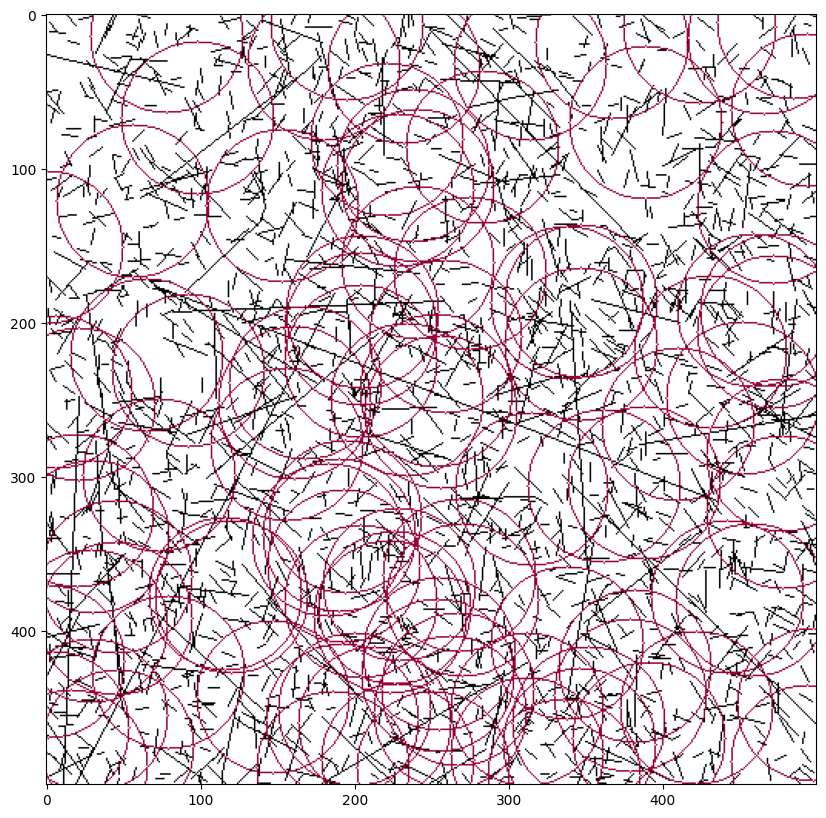

time: 188 ms (started: 2024-06-13 20:16:17 -03:00)


In [13]:
canvas = np.full((int(sizeY), int(sizeY), 3), 255, np.uint8)
# Draw the segments in the canvas

x_offset = 0
y_offset = 0

canvas = draw_lines(canvas, new_lines, x_offset, y_offset, (0,0,0))
# canvas = draw_lines(canvas, segments_in_circle, x_offset, y_offset, (255,0,0))
# segments_in_circle

for circle in circle_centers:
    cv2.circle(canvas, np.int32(circle)+np.int32([x_offset, y_offset]), 50, (150,0,56), 1)

# cv2.circle(canvas, np.int32(circle)+np.int32([x_offset, y_offset]), 50, (150,0,56), 1)

plt.figure(figsize=(10,10))
plt.imshow(canvas)

In [96]:
n_circle_centers = 15
circle_centers4 = []
for i in range(n_circle_centers):
    circle_centers4.append((np.random.uniform()*500, np.random.random()*500))


radius = 30

sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']
# sets = ['NE-SW']
results_all4 = []

for set in sets:
    # p21_mean = []
    results_set_list = []
    for circle_center in circle_centers4:
        segments_in_circle = circular_scanline(new_lines, circle_center, radius)
        segm_group_angles = compute_line_angles(segments_in_circle)


        if set == 'N-S':
            set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
        if set == 'NE-SW':
            set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'E-W':
            set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'NW-SE':
            set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

        try:
            set1 = segm_group_angles[set1 != np.array(None)]
            results_set = evaluation_routine(set1, set_name='Stochastic_sets', plot=False, metric='all')
            results_set_list.append(results_set)
        except:
            results_set_list.append([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], 
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])
            print(np.shape(set1))
            print('erro')
    results_all4.append(results_set_list)

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019


c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:374: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  D = ks_2samp(temp_data, P)[0]


------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin wi

c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:514: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_d = ks_2samp(get_cdf(X), S)[0]


------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
(11, 2)
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin wi

c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:996: RuntimeWarning: All-NaN slice encountered
  alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]


(1, 2)
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
(2, 2)
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
(7, 2)rogress: 83%
erro
Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momen

c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:512: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin with Deluca2013/Corral2019
------------------------------------------------------------------

Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
------------------------------------------------------------------

Learning rate:0.01 Momentum:0.5 Max_iter:1500 N_seeds:20
Estimating alpha and xmin with SGD
------------------------------------------------------------------

Estimating alpha and xmin wi

In [98]:
print_results([np.nanmean(np.abs(results_all4[0]), axis=0), np.nanstd(results_all4[0], axis=0)], 'N-S')
print_results([np.nanmean(np.abs(results_all4[1]), axis=0), np.nanstd(results_all4[1], axis=0)], 'NE-SW')
print_results([np.nanmean(np.abs(results_all4[2]), axis=0), np.nanstd(results_all4[2], axis=0)], 'E-W')
print_results([np.nanmean(np.abs(results_all4[3]), axis=0), np.nanstd(results_all4[3], axis=0)], 'NW-SE')

\multirow{6}{*}{N-S}  & \multirow{3}{*}{mean}   & MLE¹ & 3.667 & 7.029 & 99.692 & 0.362 & 0.489 \\ \cline{3-8} 
                    &  & MLE² & 3.215 & 6.147 & 97.880 & 0.328 & 0.438 \\ \cline{3-8} 
                    &  & SGD  & 2.853 & 7.261 & 93.804 & 0.340 & 0.458 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 1.337 & 1.025 & 0.455 & 0.144 & 0.123 \\ \cline{3-8} 
                    &  & MLE² & 1.301 & 1.844 & 1.549 & 0.117 & 0.139 \\ \cline{3-8} 
                    &  & SGD  & 0.684 & 2.990 & 13.820 & 0.114 & 0.119 \\ \cline{3-8} 
 \cline{2-8} 
 \hline \hline
\multirow{6}{*}{NE-SW}  & \multirow{3}{*}{mean}   & MLE¹ & 3.305 & 8.062 & 99.952 & 0.367 & 0.564 \\ \cline{3-8} 
                    &  & MLE² & 2.751 & 7.787 & 97.920 & 0.423 & 0.542 \\ \cline{3-8} 
                    &  & SGD  & 2.942 & 11.180 & 100.000 & 0.307 & 0.525 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 0.975 & 1.776 & 0.059 & 0.067 & 0.031 \\ \cline{3-8} 
                  

In [15]:
def get_circle_centers_grid(maxH, maxV, radius):
    circumference = radius*2
    maxH = int(np.shape(image)[0]/circumference)+1
    maxV = int(np.shape(image)[1]/circumference)+1

    # circle_area = np.pi*radius**2
    circle_centers = []

    for i in range(0, maxV):
        for j in range(0, maxH):
            x0 = float(i*circumference)
            x1 = float((i+1)*circumference)
            y0 = float(j*circumference)
            y1 = float((j+1)*circumference)
            circle_center = (np.mean((x0, x1)), np.mean((y0, y1)))
            circle_centers.append(circle_center)
    return circle_centers


time: 0 ns (started: 2024-06-14 13:52:37 -03:00)


In [16]:
circle_centers2 = get_circle_centers_grid(500, 500, radius)

time: 0 ns (started: 2024-06-14 13:52:40 -03:00)


In [369]:
radius = 50

sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']
# sets = ['NE-SW']
results_all2 = []

for set in sets:
    # p21_mean = []
    results_set_list = []
    for circle_center in circle_centers2:
        segments_in_circle = circular_scanline(new_lines, circle_center, radius)
        segm_group_angles = compute_line_angles(segments_in_circle)


        if set == 'N-S':
            set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
        if set == 'NE-SW':
            set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'E-W':
            set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'NW-SE':
            set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

        try:
            set1 = segm_group_angles[set1 != np.array(None)]
            results_set = evaluation_routine(set1, set_name='Stochastic_sets', plot=False)
            results_set_list.append(results_set)
        except:
            results_set_list.append([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], 
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])
            print(np.shape(set1))
            print('erro')
    results_all2.append(results_set_list)

Estimating alpha and xmin with SGD


C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\3436178384.py:8: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]
c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)


Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD


C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\733554800.py:14: RuntimeWarning: All-NaN slice encountered
  alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]


(2, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019


C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\3837162424.py:27: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  D = ks_2samp(temp_data, P)[0]


Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
(1, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral201

C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\3436178384.py:8: UserWarning: p-value floored: true value smaller than 0.001
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
(1, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral201

C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\3436178384.py:10: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_d = ks_2samp(get_cdf(X), S)[0]


Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
(1, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral201

In [370]:
print_results([np.nanmean(np.abs(results_all2[0]), axis=0), np.nanstd(results_all2[0], axis=0)], 'N-S')
print_results([np.nanmean(np.abs(results_all2[1]), axis=0), np.nanstd(results_all2[1], axis=0)], 'NE-SW')
print_results([np.nanmean(np.abs(results_all2[2]), axis=0), np.nanstd(results_all2[2], axis=0)], 'E-W')
print_results([np.nanmean(np.abs(results_all2[3]), axis=0), np.nanstd(results_all2[3], axis=0)], 'NW-SE')

\multirow{6}{*}{N-S}  & \multirow{3}{*}{mean}   & MLE¹ & 3.120 & 7.235 & 99.390 & 0.386 & 0.486 \\ \cline{3-8} 
                    &  & MLE² & 2.811 & 7.713 & 97.070 & 0.378 & 0.453 \\ \cline{3-8} 
                    &  & SGD  & 2.765 & 8.191 & 99.922 & 0.417 & 0.499 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 0.582 & 1.683 & 0.582 & 0.135 & 0.068 \\ \cline{3-8} 
                    &  & MLE² & 0.493 & 1.924 & 4.547 & 0.130 & 0.095 \\ \cline{3-8} 
                    &  & SGD  & 0.505 & 1.728 & 0.102 & 0.112 & 0.069 \\ \cline{3-8} 
 \cline{2-8} 
 \hline \hline
\multirow{6}{*}{NE-SW}  & \multirow{3}{*}{mean}   & MLE¹ & 3.212 & 7.765 & 99.520 & 0.411 & 0.530 \\ \cline{3-8} 
                    &  & MLE² & 2.881 & 8.066 & 98.107 & 0.371 & 0.481 \\ \cline{3-8} 
                    &  & SGD  & 2.756 & 9.978 & 99.985 & 0.450 & 0.519 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 0.872 & 2.183 & 0.617 & 0.121 & 0.055 \\ \cline{3-8} 
                    &

In [19]:
radius = 30

sets = ['N-S', 'NE-SW', 'E-W', 'NW-SE']
# sets = ['NE-SW']
results_all3 = []

for set in sets:
    # p21_mean = []
    results_set_list = []
    for circle_center in circle_centers2:
        segments_in_circle = circular_scanline(new_lines, circle_center, radius)
        segm_group_angles = compute_line_angles(segments_in_circle)


        if set == 'N-S':
            set1 = np.where((segm_group_angles[:, 0] <= 25) | (segm_group_angles[:, 0] > 155) & (segm_group_angles[:, 1] > 0), segm_group_angles[:, 0], None)
        if set == 'NE-SW':
            set1 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'E-W':
            set1 = np.where((segm_group_angles[:, 0] > 65) & (segm_group_angles[:, 0] <= 115) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)
        if set == 'NW-SE':
            set1 = np.where((segm_group_angles[:, 0] > 115) & (segm_group_angles[:, 0] <= 155) & (segm_group_angles[:, 1] >0), segm_group_angles[:, 0], None)

        try:
            set1 = segm_group_angles[set1 != np.array(None)]
            results_set = evaluation_routine(set1, set_name='Stochastic_sets', plot=False)
            results_set_list.append(results_set)
        except:
            results_set_list.append([[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], 
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                                    [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]])
            print(np.shape(set1))
            print('erro')
    results_all3.append(results_set_list)

Estimating alpha and xmin with SGD
(3, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019


c:\Anaconda3\envs\py310\lib\site-packages\scipy\stats\_stats_py.py:9081: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(xvals, yvals, alternative=alternative, method=method)
c:\Users\Ademir Marques Jr\OneDrive - Associacao Antonio Vieira\Unisinos\_Fraturas_com_Graci\Artigo Powerlaw-Fractal\SGD_PowerLaw.py:474: UserWarning: p-value capped: true value larger than 0.25
  A2 = anderson_ksamp([get_cdf(X), S], midrank=True)[0]


Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
(5, 2)rogress: 75%
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
(7, 2)
erro
Estimating alpha and xmin with SGD
(0, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alph

C:\Users\Ademir Marques Jr\AppData\Local\Temp\ipykernel_20356\733554800.py:14: RuntimeWarning: All-NaN slice encountered
  alpha_sgd = alpha_history[np.where(cost_history==np.nanmin(cost_history))][0]


(2, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Estimating alpha and xmin with SGD
(1, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Estimating alpha and xmin with SGD
(4, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
Estimating alpha and xmin with Clauset2009/Alstot2013
Calculating best minimal value for power law fit
Estimating alpha and xmin with SGD
(4, 2)
erro
Estimating alpha and xmin with SGD
(0, 2)
erro
Estimating alpha and xmin with SGD
(0, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with Deluca2013/Corral2019
(5, 2)
erro
Estimating alpha and xmin with SGD
(4, 2)
erro
Estimating alpha and xmin with SGD
(8, 2)
erro
Estimating alpha and xmin with SGD
Estimating alpha and xmin with De

In [22]:
print_results([np.nanmedian(np.abs(results_all3[0]), axis=0), np.nanstd(results_all3[0], axis=0)], 'N-S')
print_results([np.nanmedian(np.abs(results_all3[1]), axis=0), np.nanstd(results_all3[1], axis=0)], 'NE-SW')
print_results([np.nanmedian(np.abs(results_all3[2]), axis=0), np.nanstd(results_all3[2], axis=0)], 'E-W')
print_results([np.nanmedian(np.abs(results_all3[3]), axis=0), np.nanstd(results_all3[3], axis=0)], 'NW-SE')

\multirow{6}{*}{N-S}  & \multirow{3}{*}{mean}   & MLE¹ & 3.135 & 6.411 & 99.960 & 0.333 & 0.531 \\ \cline{3-8} 
                    &  & MLE² & 2.960 & 6.601 & 99.920 & 0.444 & 0.509 \\ \cline{3-8} 
                    &  & SGD  & 2.361 & 10.511 & 100.000 & 0.667 & 0.598 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 0.927 & 2.378 & 0.135 & 0.110 & 0.071 \\ \cline{3-8} 
                    &  & MLE² & 0.672 & 1.334 & 0.762 & 0.102 & 0.097 \\ \cline{3-8} 
                    &  & SGD  & 0.742 & 3.604 & 0.011 & 0.270 & 0.133 \\ \cline{3-8} 
 \cline{2-8} 
 \hline \hline
\multirow{6}{*}{NE-SW}  & \multirow{3}{*}{mean}   & MLE¹ & 2.562 & 6.765 & 99.860 & 0.402 & 0.581 \\ \cline{3-8} 
                    &  & MLE² & 2.562 & 6.761 & 99.920 & 0.500 & 0.553 \\ \cline{3-8} 
                    &  & SGD  & 2.077 & 8.434 & 100.000 & 0.667 & 0.530 \\ \cline{3-8} 
 \cline{2-8} 
& \multirow{3}{*}{std}   & MLE¹ & 1.007 & 5.924 & 0.547 & 0.110 & 0.065 \\ \cline{3-8} 
                  

## Tests

In [33]:
set1_2 = np.where((segm_group_angles[:, 0] > 25) & (segm_group_angles[:, 0] <= 65) & (segm_group_angles[:, 1] >0),
         segm_group_angles[:, 0], None)

set1_2 = segm_group_angles[set1_2 != np.array(None)]


time: 0 ns (started: 2024-06-20 13:57:52 -03:00)


In [115]:
results = powerlaw_fit_SGD(set1_2[:, 1], 1000, 0.01, 20, momentum=0.8,
                                      fix_x_min=None, metric = 'KS_t', multiprocessing=True, early_stopping=True)
alpha_history, x_min_history, cost_history = results
print(cost_history[0])

[69.56 69.56 69.56 69.44 67.88 67.88 67.88 64.64 61.92 60.12 56.24 52.88
 52.88 52.88 52.   45.8  43.2  39.12 39.12 39.12 39.12 39.12 37.96 35.96
 31.76 26.52 24.28 24.28 24.28 23.36 23.36 23.36 23.36 23.36 23.36 23.36
 23.08 19.32 15.6  12.08 11.12  6.92  4.52  3.88  3.76  3.76  3.76  3.6
  3.6   3.6   3.6   3.6   3.6   3.4   3.4   3.2   2.84  2.84  2.84  2.84
  2.84  2.76  2.56  2.2   2.12  2.    2.    2.    2.    2.    2.    2.
  2.    2.    2.    1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96
  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96
  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96
  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.96  1.92  1.92
  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92
  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92
  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92
  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92

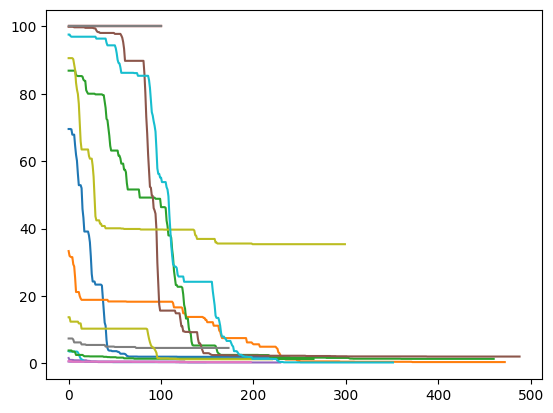

time: 78 ms (started: 2024-06-25 10:54:23 -03:00)


In [118]:
for i in range(n_seeds):
    plt.plot(cost_history[i])

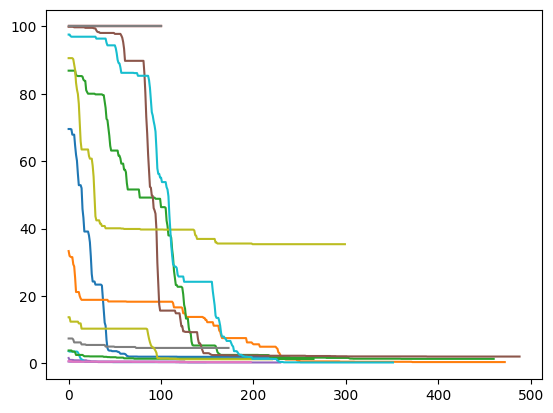

time: 78 ms (started: 2024-06-25 10:53:44 -03:00)


In [ ]:
for i in range(n_seeds):
    plt.plot(cost_history[i])

In [321]:
alpha_, xmin_ = powerlaw_fit_MLE(set1_1[:,1])
alpha_, xmin_

(2.1091666375109597, 2.164363115653195)

time: 3.58 s (started: 2024-06-18 03:21:51 -03:00)


In [40]:
def kstest_hit_ratio2(X, alpha=1.1, xmin=1, max_iter=2500, ref=0.05, mode='pvalue', synthetic_data=None):
  # X = np.sort(X)
  if type(synthetic_data) == type(None):
    # np.random.seed(3)
    # r = np.array(np.random.uniform(0.0, 1.0, size=(max_iter, np.size(X))), dtype=np.float64)
    r = np.random.default_rng().uniform(size=(max_iter, np.size(X)))
    power = lambda r: xmin*np.power((1-r),(-1/(alpha-1)), dtype=np.float64)# Equation D.4 from Clauset, 2009
    g = np.sort(power(r), axis=1)

  temp_X = np.reshape(np.tile(X, max_iter), (max_iter, np.size(X)))
  test = np.asarray(list(map(kstest, temp_X, g)))

  if mode=='pvalue':
    return (np.size(np.where(test[:,1] > ref))/max_iter)*100
  if mode=='distance':
    return (np.size(np.where(test[:,0] > ref))/max_iter)*100

time: 16 ms (started: 2024-06-20 14:09:14 -03:00)


In [29]:
kstest_hit_ratio2(set1_2[:,1], alpha=2.5, xmin=6.59, max_iter=2500, ref=0.05, mode='pvalue', synthetic_data=None)

0.0

time: 281 ms (started: 2024-06-20 12:12:26 -03:00)


## Aereal sampling

In [8]:
# Get fracture traces in scanlines
radius = 100

# circle_center1 = (70, 55)
circle_center3 = [150, 150]
segments_in_circle3 = circular_scanline(new_lines, circle_center3, radius)

# circle_center2 = (200, 150.0)
circle_center4 = [350, 350]
segments_in_circle4 = circular_scanline(new_lines, circle_center4, radius)

(402, 4)
(374, 4)
time: 32 ms (started: 2024-05-27 11:10:51 -03:00)


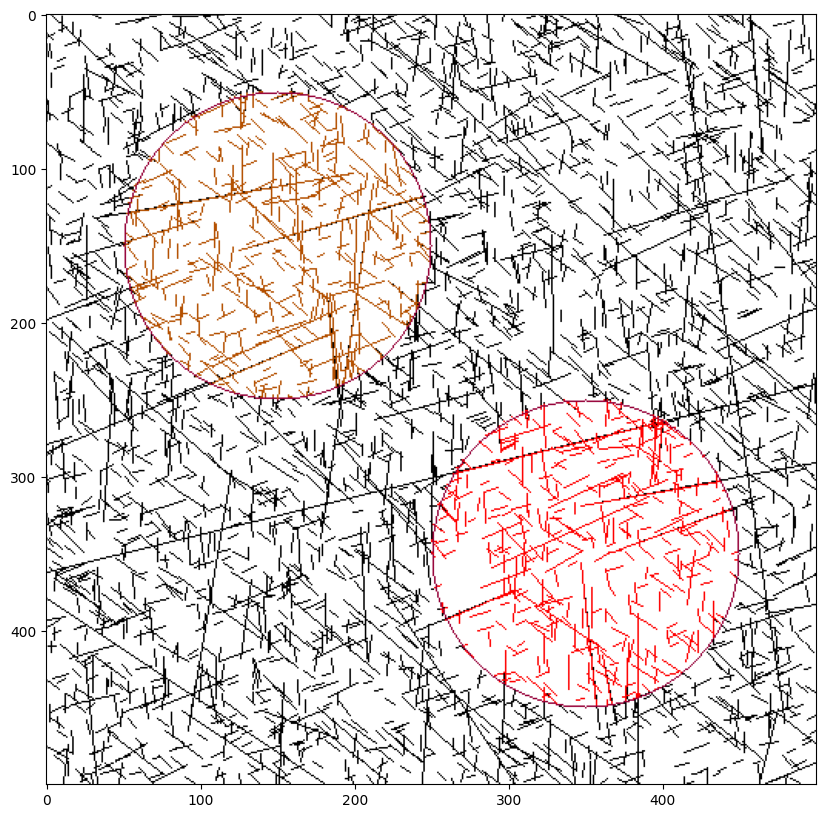

time: 172 ms (started: 2024-05-27 11:10:55 -03:00)


In [9]:
canvas = np.full((int(sizeY), int(sizeY), 3), 255, np.uint8)
# Draw the segments in the canvas

x_offset = 0
y_offset = 0

canvas = draw_lines(canvas, new_lines, x_offset, y_offset, (0,0,0))
canvas = draw_lines(canvas, segments_in_circle3, x_offset, y_offset, (180,80,0))
canvas = draw_lines(canvas, segments_in_circle4, x_offset, y_offset, (255,0,0))

   
cv2.circle(canvas, np.int32(circle_center3)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)
cv2.circle(canvas, np.int32(circle_center4)+np.int32([x_offset, y_offset]), radius, (150,0,56), 1)

plt.figure(figsize=(10,10))
plt.imshow(canvas)